In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.formula.api as smf
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind


In [147]:
# loading Latest COVID-19 India Statewise Vaccine Data dataset
data = pd.read_csv('COVID-19 India Statewise Vaccine Data.csv')
data.head()

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


In [148]:
# data attributes or columns
data.columns

Index(['State/UTs', 'Total Vaccination Doses', 'Dose 1', 'Dose 2',
       'Population'],
      dtype='object')

In [153]:
# renaming data attributes for manipulation
covid=data.rename(columns={'State/UTs':'States','Total Vaccination Doses':'Total_Vaccination_Doses','Dose 1':'Dose_1',
                           'Dose 2':'Dose_2','Population':'Population'})
covid.head()

,States,Total_Vaccination_Doses,Dose_1,Dose_2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


In [154]:
# checking data size and missing data
print(covid.shape)
print(covid.isnull().sum())

(36, 5)
States                     0
Total_Vaccination_Doses    0
Dose_1                     0
Dose_2                     0
Population                 0
dtype: int64


In [155]:
# descriptive statistics
covid.describe()

,Total_Vaccination_Doses,Dose_1,Dose_2,Population
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,4.921979e+07,2.549133e+07,2.372846e+07,3.971861e+07
std,6.252012e+07,3.226311e+07,3.029808e+07,5.050913e+07
min,1.123780e+05,5.683100e+04,5.554700e+04,6.600100e+04
25%,1.906027e+06,1.042061e+06,8.696295e+05,1.695473e+06
50%,3.381891e+07,1.770508e+07,1.495231e+07,2.410088e+07
75%,8.740200e+07,4.278546e+07,4.417638e+07,6.979986e+07
max,2.997738e+08,1.536694e+08,1.461044e+08,2.315026e+08


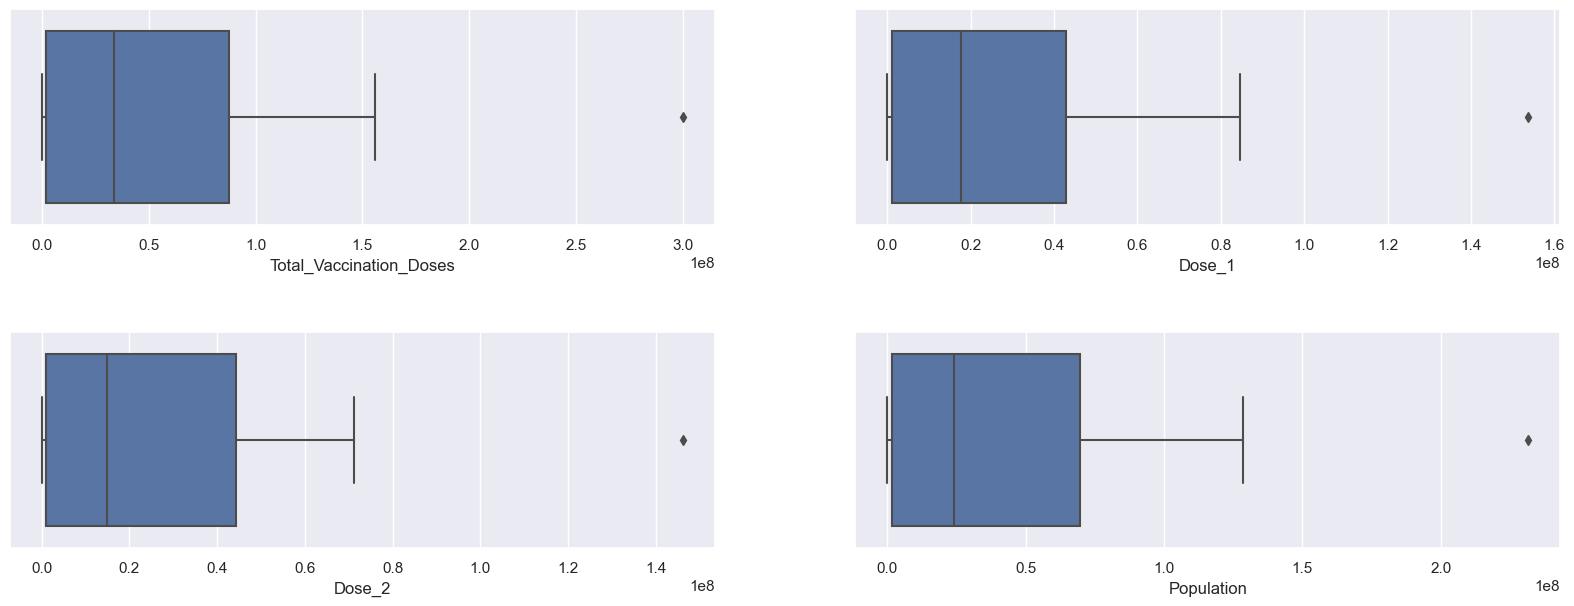

In [156]:
# boxplots for raw dataset, checking data symmetry and outliers
plt.figure(1, figsize=(20,7))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.2)

plt.subplot(221)
sns.boxplot(x='Total_Vaccination_Doses', data=covid)

plt.subplot(222)
sns.boxplot(x='Dose_1', data=covid)

plt.subplot(223)
sns.boxplot(x='Dose_2', data=covid)

plt.subplot(224)
sns.boxplot(x='Population', data=covid)

plt.show()
#plt.savefig('Activebox.tif')

In [157]:
# data trimming (removing outliers)
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit  = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] <  lower_limit) & (df_in[col_name] > upper_limit)]

In [158]:
cols = ['Total_Vaccination_Doses','Dose_1','Dose_2','Population']
Q1 = covid[cols].quantile(0.25)
Q3 = covid[cols].quantile(0.75)
IQR = Q3 - Q1
covid_1 = covid[~((covid[cols] < (Q1 - 1.5 * IQR)) |(covid[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
covid_1.head()
#covid_1.shape

,States,Total_Vaccination_Doses,Dose_1,Dose_2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


In [159]:
cols = ['Total_Vaccination_Doses','Dose_1','Dose_2','Population']
Q1 = covid_1[cols].quantile(0.25)
Q3 = covid_1[cols].quantile(0.75)
IQR = Q3 - Q1
covid_2 = covid_1[~((covid_1[cols] < (Q1 - 1.5 * IQR)) |(covid_1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
covid_2.head()
#covid_2.shape

,States,Total_Vaccination_Doses,Dose_1,Dose_2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


In [160]:
cols = ['Total_Vaccination_Doses','Dose_1','Dose_2','Population']
Q1 = covid_2[cols].quantile(0.25)
Q3 = covid_2[cols].quantile(0.75)
IQR = Q3 - Q1
covid_3 = covid_2[~((covid_2[cols] < (Q1 - 1.5 * IQR)) |(covid_2[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
covid_3.head()

,States,Total_Vaccination_Doses,Dose_1,Dose_2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


In [161]:
# checking new data size and missing data verification
print(covid_3.shape)
print(covid_3.isnull().sum())

(35, 5)
States                     0
Total_Vaccination_Doses    0
Dose_1                     0
Dose_2                     0
Population                 0
dtype: int64


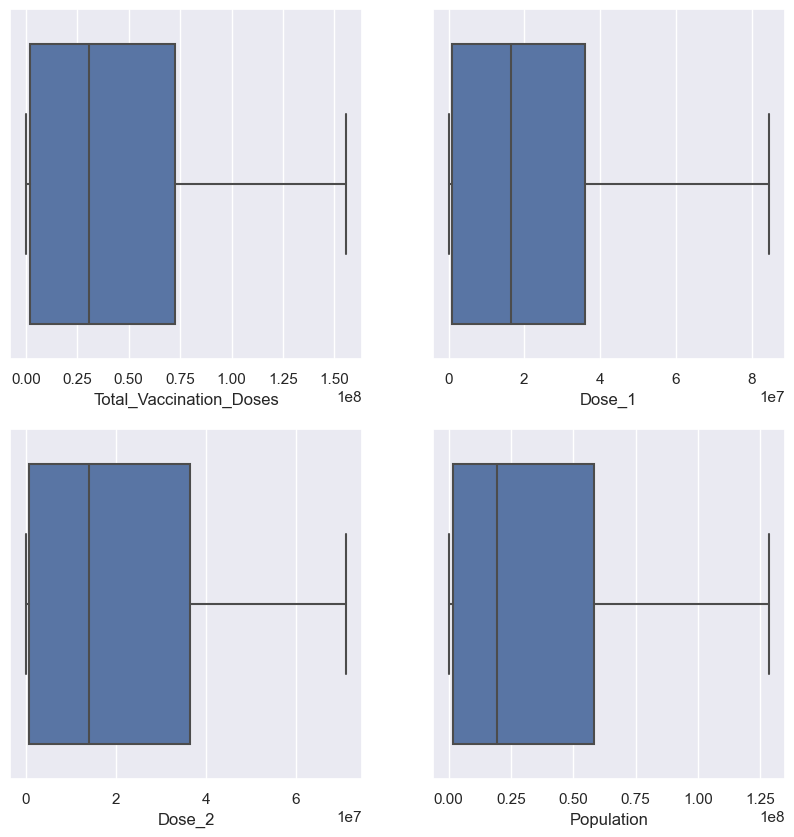

In [162]:
#  boxplots for clean dataset, checking data symmetry, total outliers elimination
plt.figure(1, figsize=(10,10))
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)

plt.subplot(221)
sns.boxplot(x='Total_Vaccination_Doses', data=covid_3)

plt.subplot(222)
sns.boxplot(x='Dose_1', data=covid_3)

plt.subplot(223)
sns.boxplot(x='Dose_2', data=covid_3)

plt.subplot(224)
sns.boxplot(x='Population', data=covid_3)

plt.show()
#plt.savefig('allcleanbox.tif')

In [163]:
# selecting attributes of raw dataset for skewness and kurtosis calculation 
covid_t=covid[['Total_Vaccination_Doses','Dose_1','Dose_2','Population']]
covid_t.head()

,Total_Vaccination_Doses,Dose_1,Dose_2,Population
0,629054,311893,317161,399001
1,84147957,40624263,43523694,91702478
2,1596166,856732,739434,1711947
3,42998698,22535419,20463279,35998752
4,119963226,62590002,57373224,128500364


In [164]:
# selecting attributes for cleaned dataset for skewness and kurtosis calculation 
covid_3t=covid_3[['Total_Vaccination_Doses','Dose_1','Dose_2','Population']]
covid_3t.head()

,Total_Vaccination_Doses,Dose_1,Dose_2,Population
0,629054,311893,317161,399001
1,84147957,40624263,43523694,91702478
2,1596166,856732,739434,1711947
3,42998698,22535419,20463279,35998752
4,119963226,62590002,57373224,128500364


Total_Vaccination_Doses
skewness: 2.01
kurtosis: 5.18


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


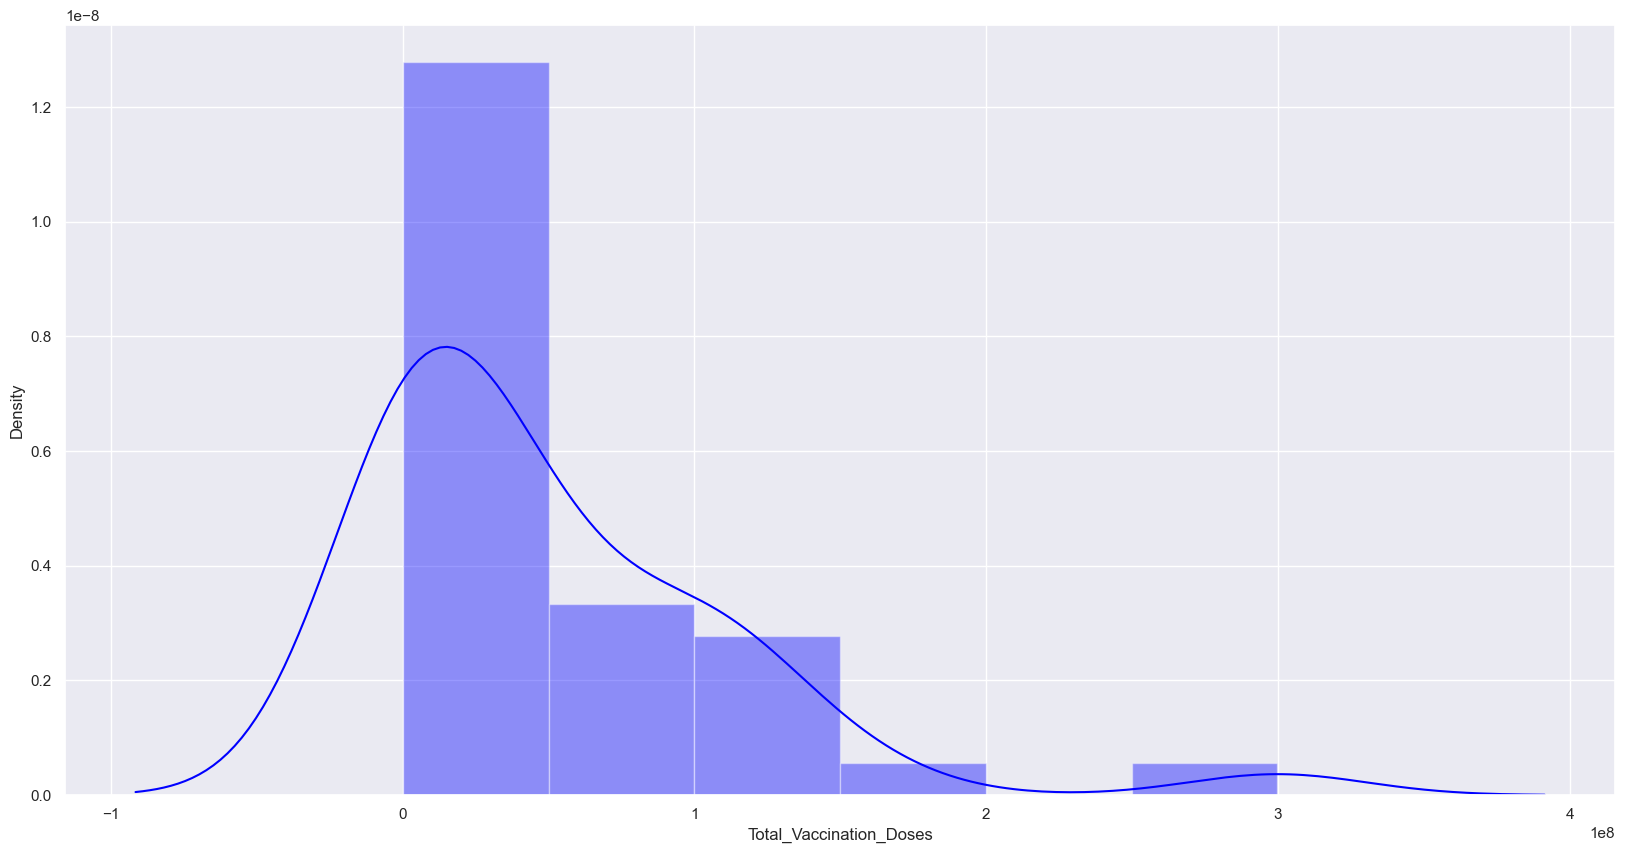

Dose_1
skewness: 1.99
kurtosis: 5.01


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


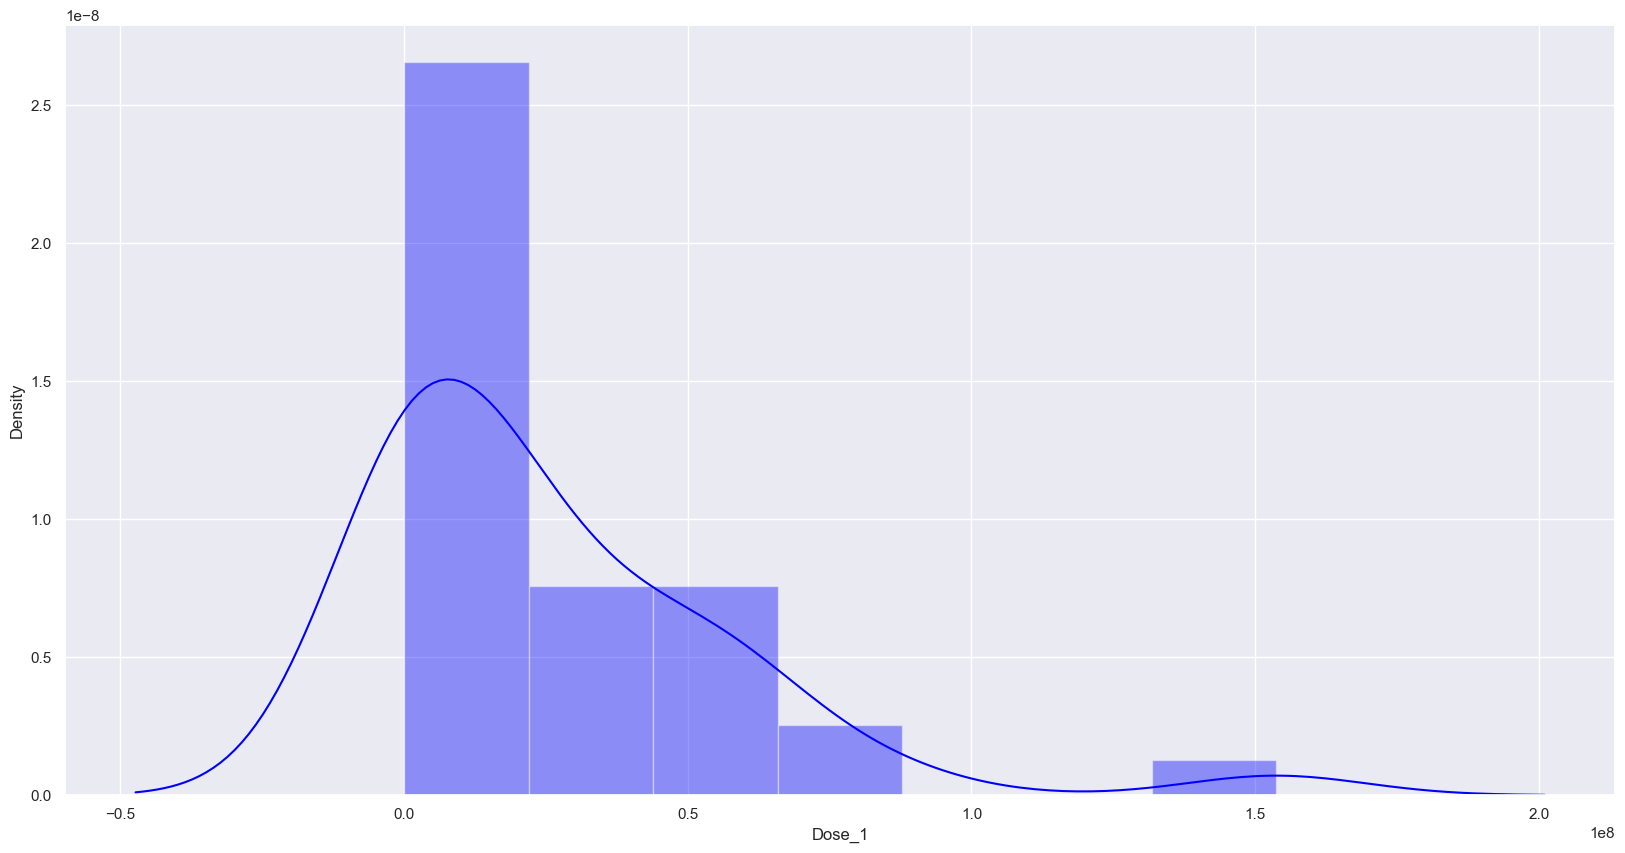

Dose_2
skewness: 2.03
kurtosis: 5.35


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


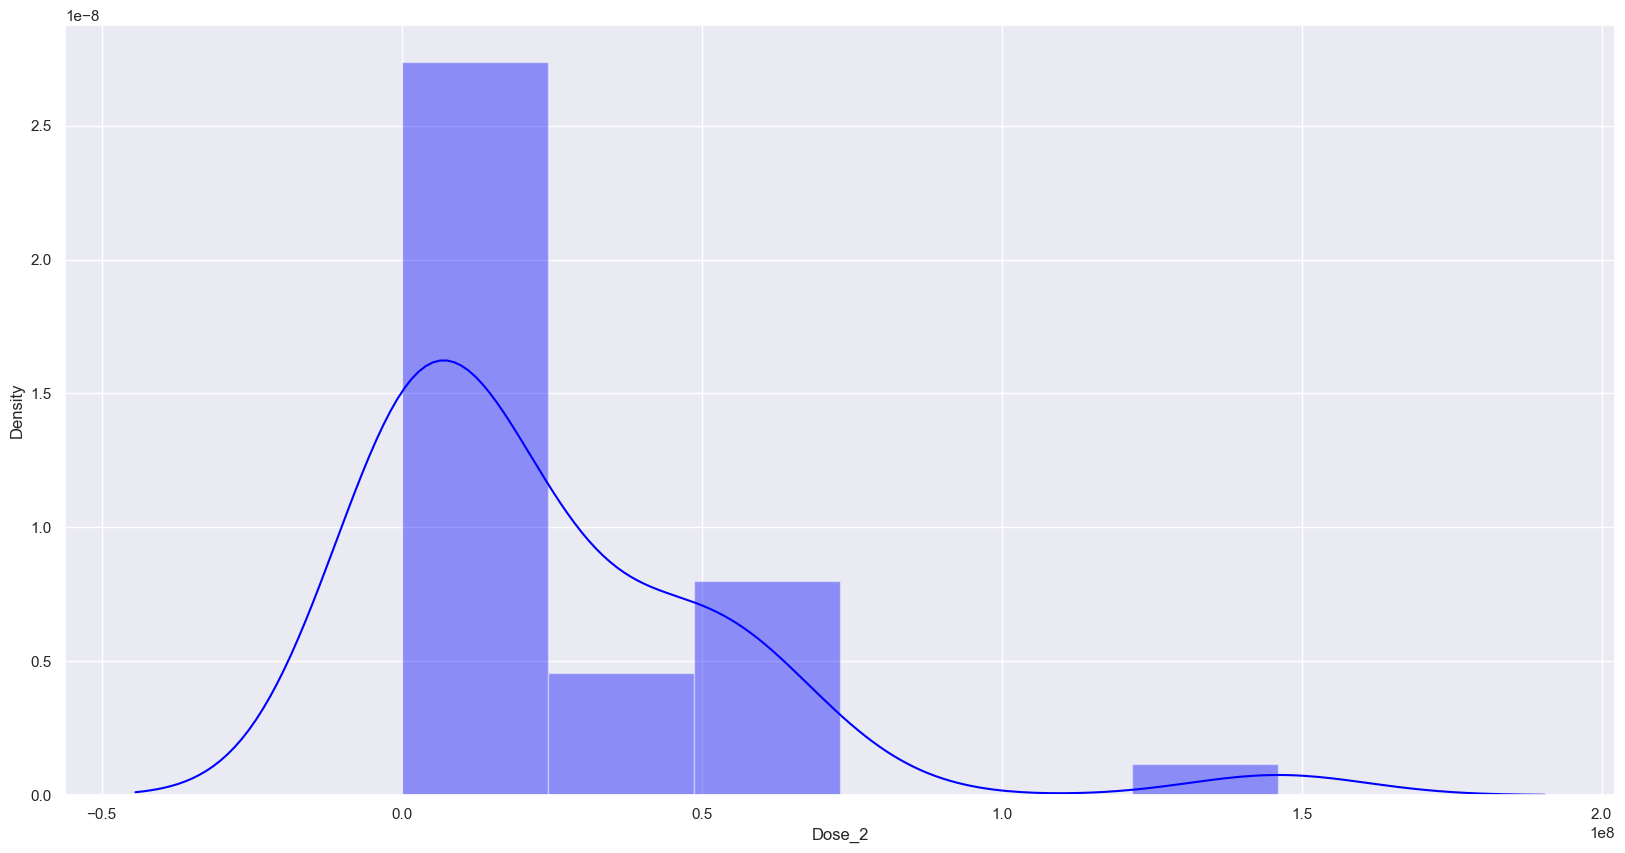

Population
skewness: 1.84
kurtosis: 3.92


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


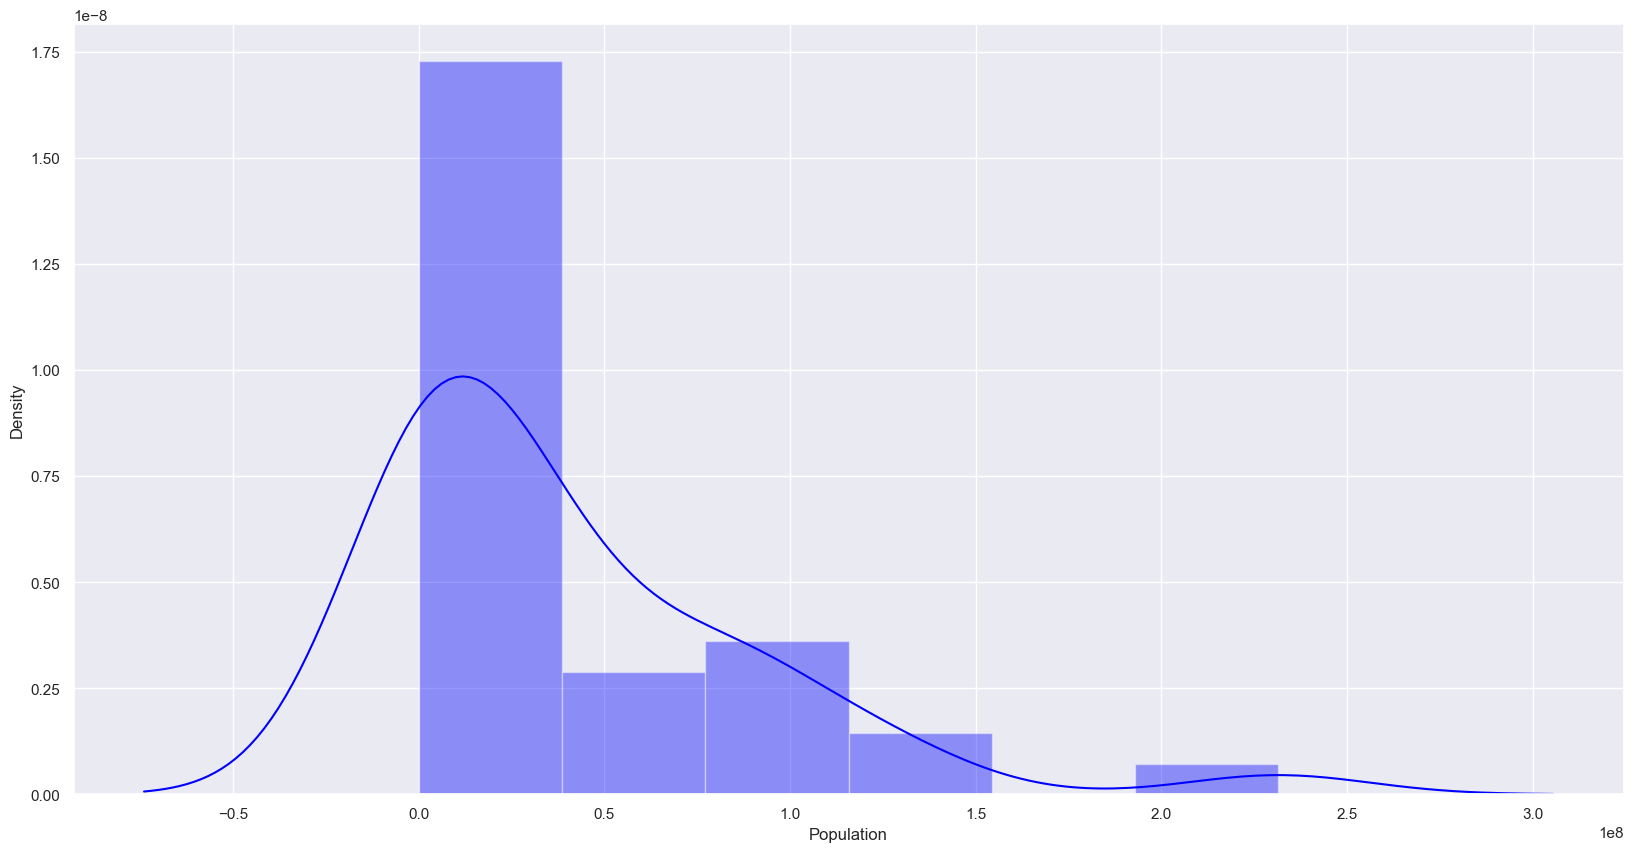

In [165]:
# distplot with attributes skewness and kurtosis
for col in covid_t:
    print(col)
    print('skewness: %.2f' % skew(covid_t[col]))
    print ('kurtosis: %.2f' % kurtosis(covid_t[col]))
    plt.figure()
    sns.distplot(covid_t[col], color='blue')
    plt.show()

Total_Vaccination_Doses
skewness: 0.86
kurtosis: -0.52


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


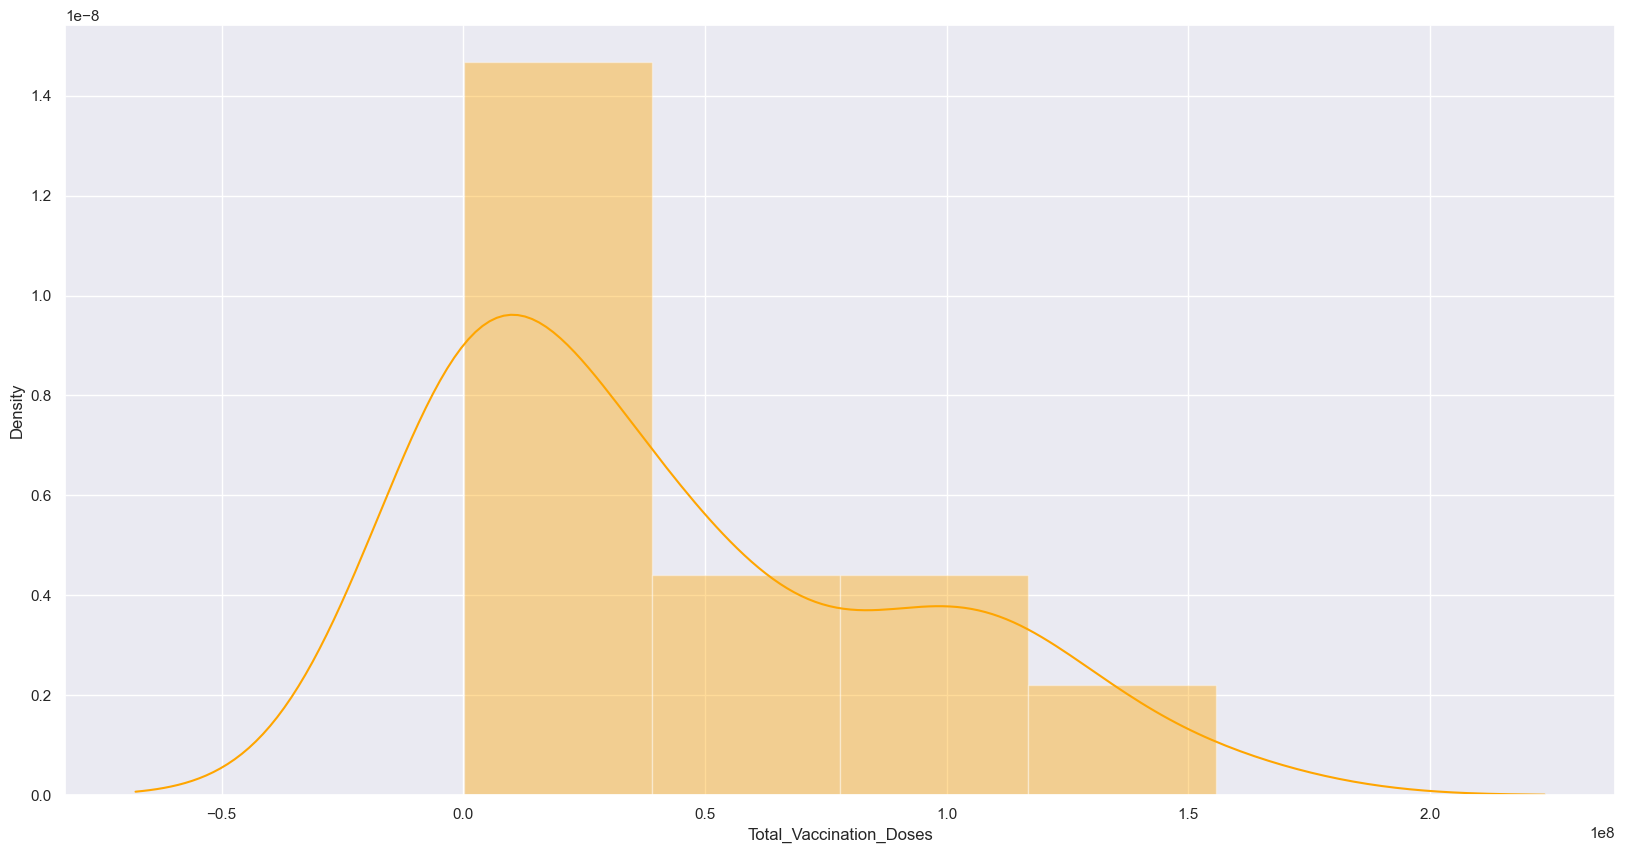

Dose_1
skewness: 0.91
kurtosis: -0.26


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


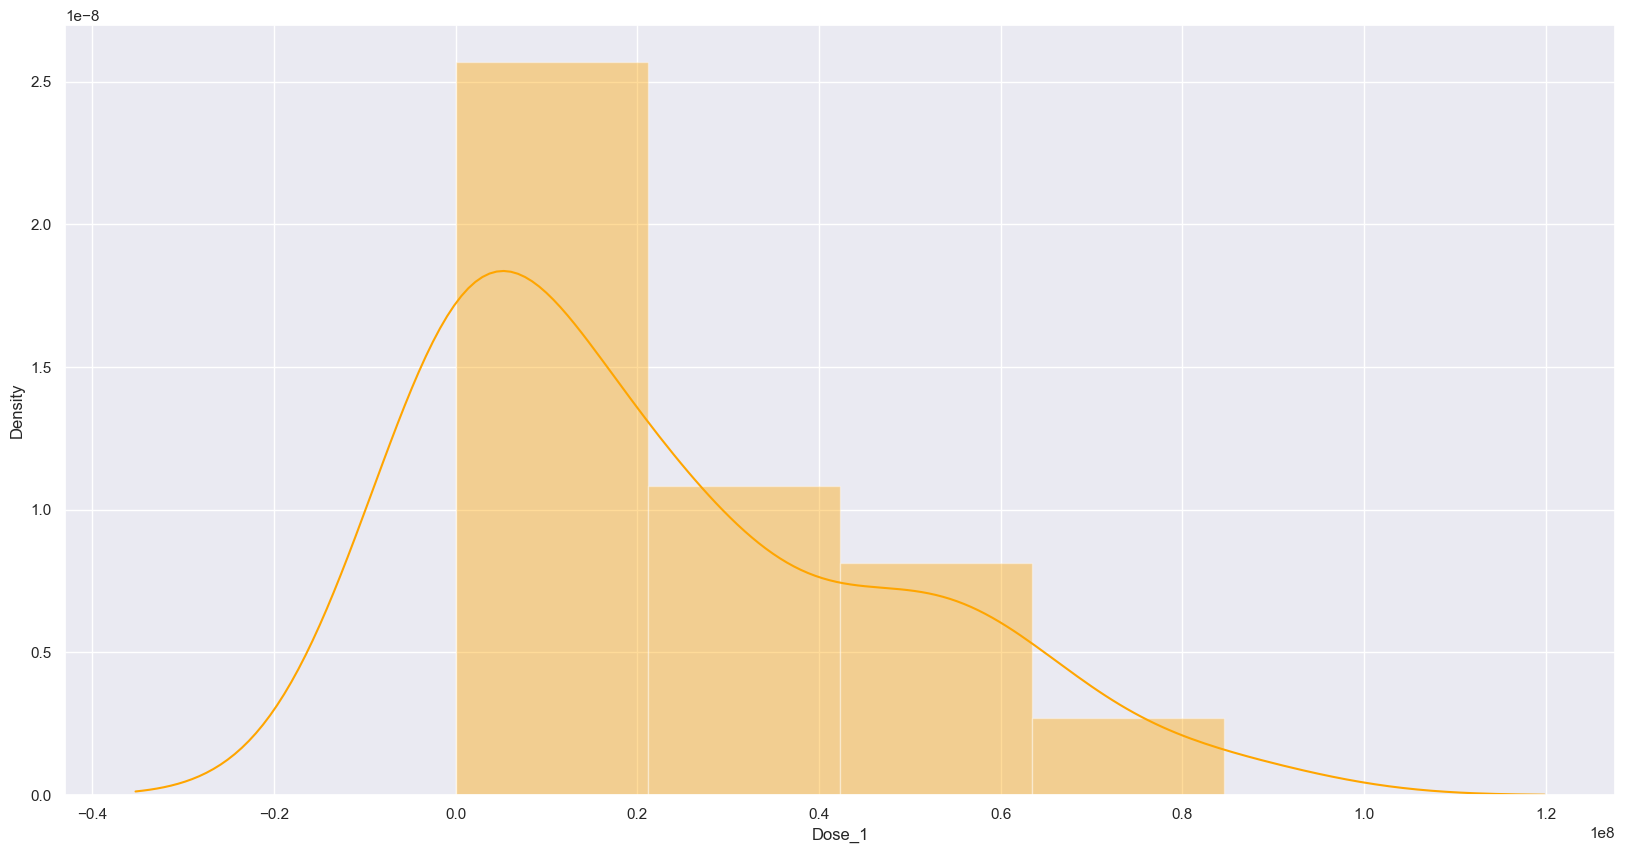

Dose_2
skewness: 0.81
kurtosis: -0.74


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


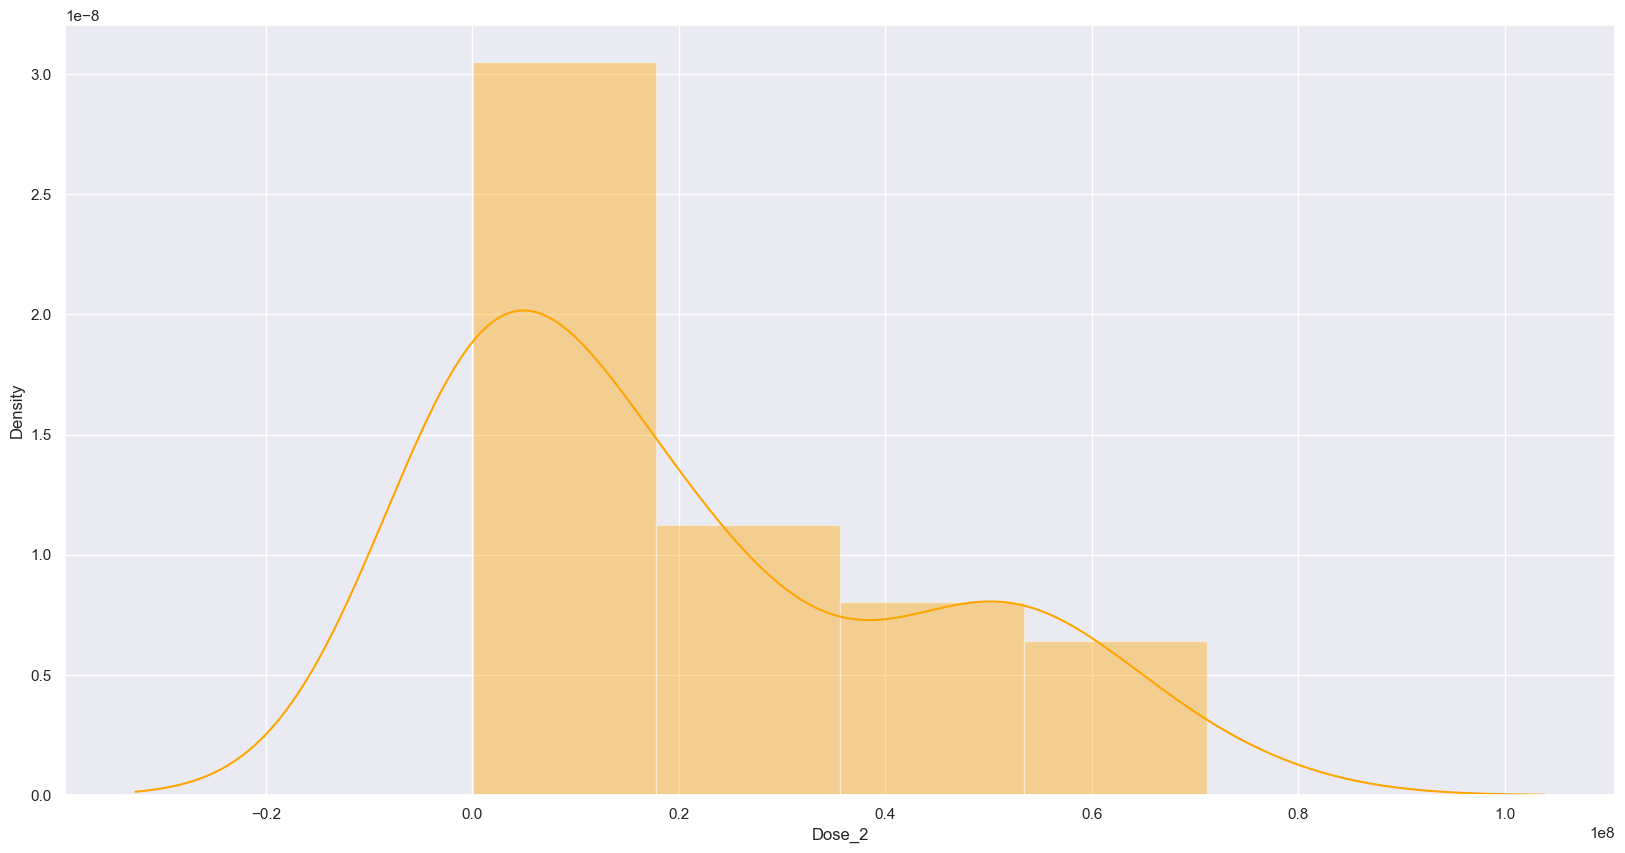

Population
skewness: 1.00
kurtosis: -0.17


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


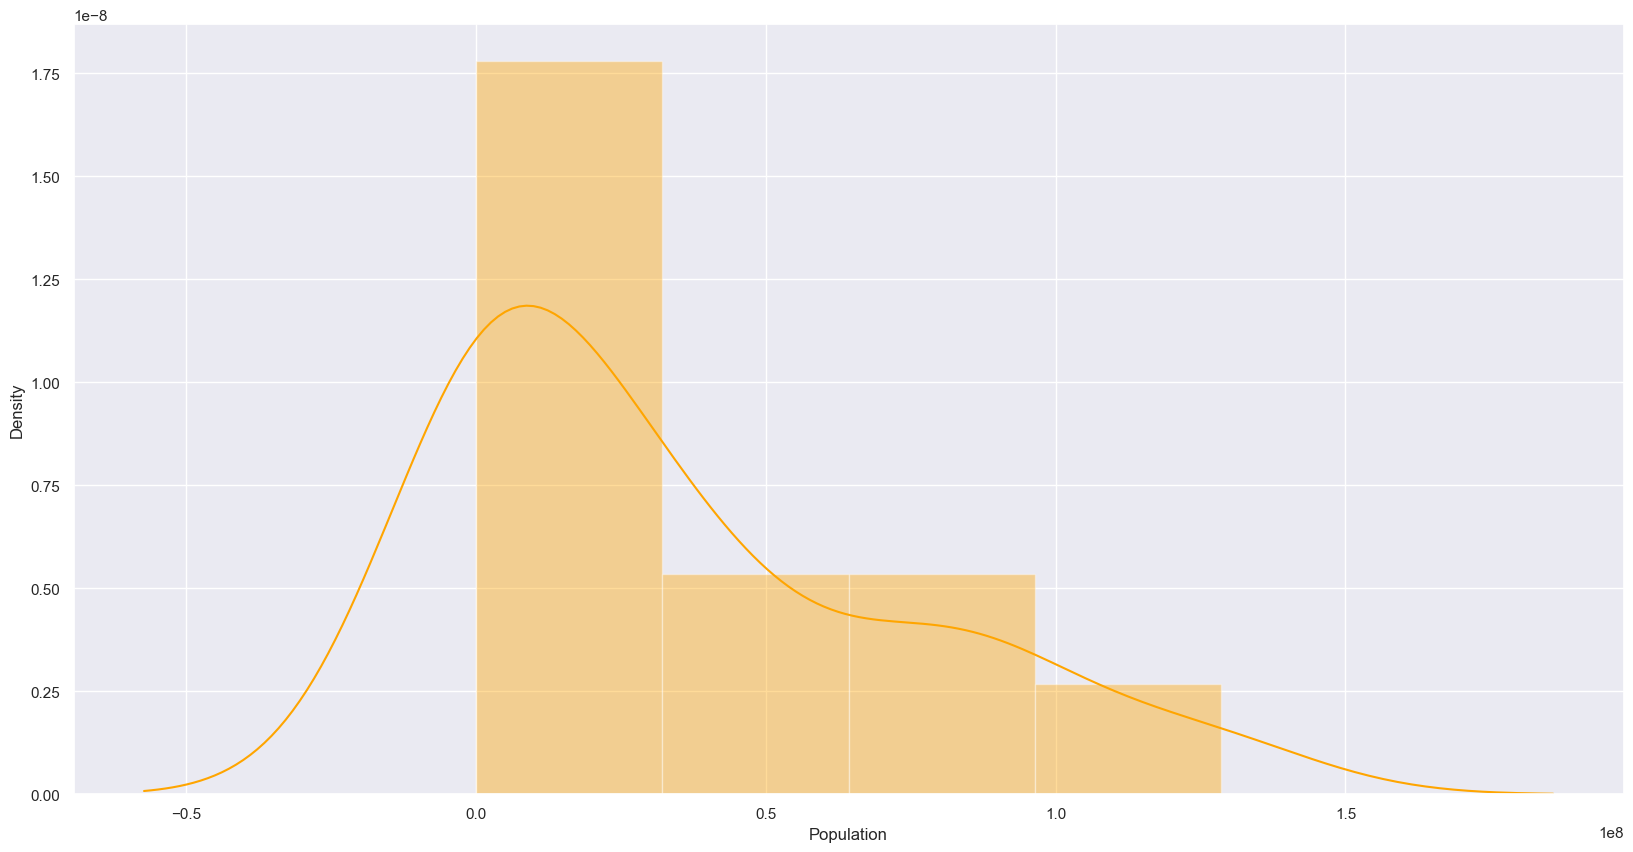

In [166]:
for col in covid_3t:
    print(col)
    print('skewness: %.2f' % skew(covid_3t[col]))
    print ('kurtosis: %.2f' % kurtosis(covid_3t[col]))
    plt.figure()
    sns.distplot(covid_3t[col], color='orange')
    plt.show()

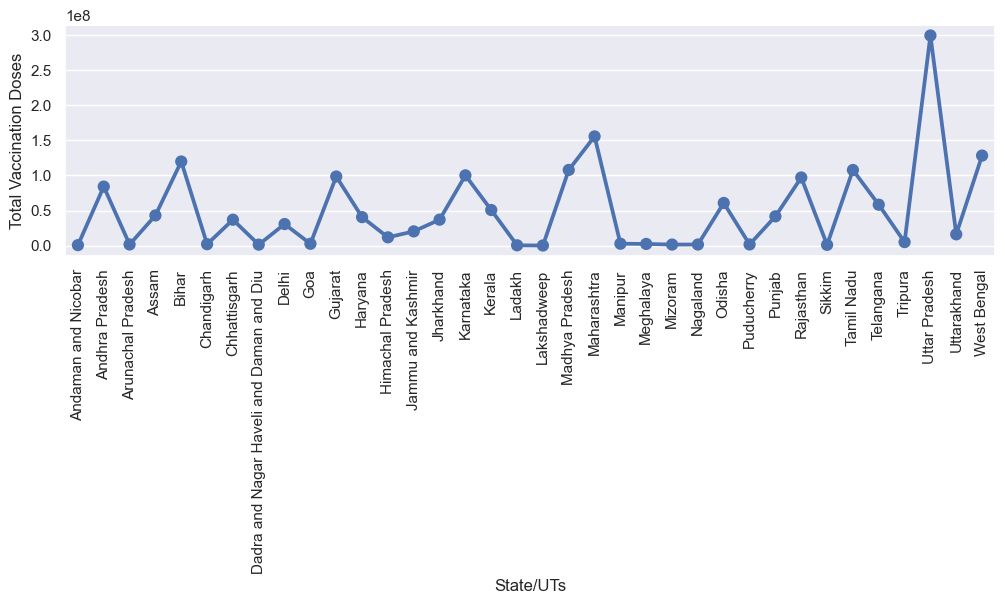

In [167]:
# pointplot of raw dataset
plt.figure(figsize=(12,3))
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Total Vaccination Doses',data=data)
plt.show()
#plt.savefig('TVP.tif')

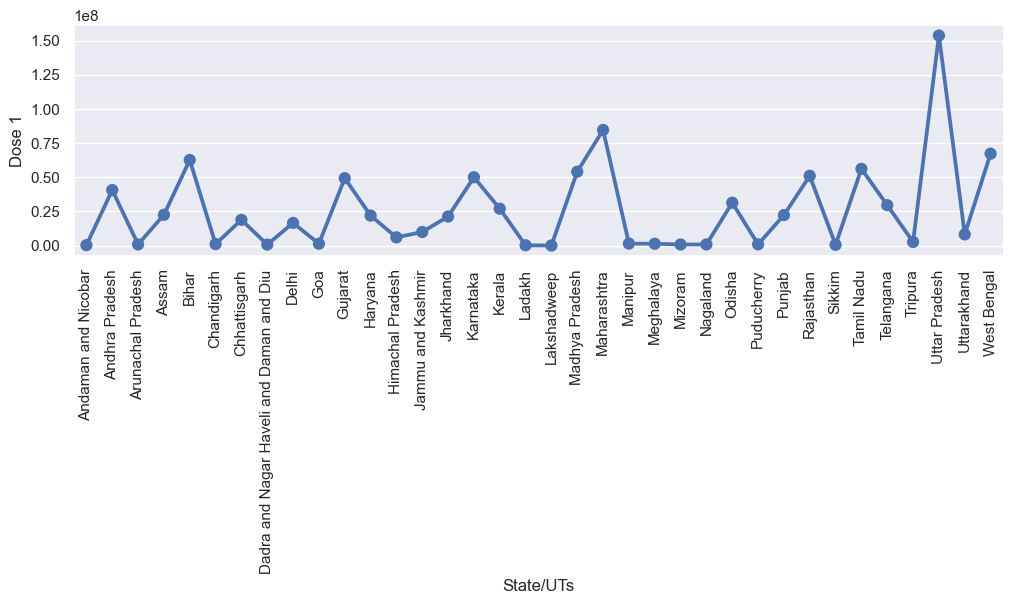

In [168]:
plt.figure(figsize=(12,3))
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Dose 1',data=data)
plt.show()
#plt.savefig('ppltDose.tif')

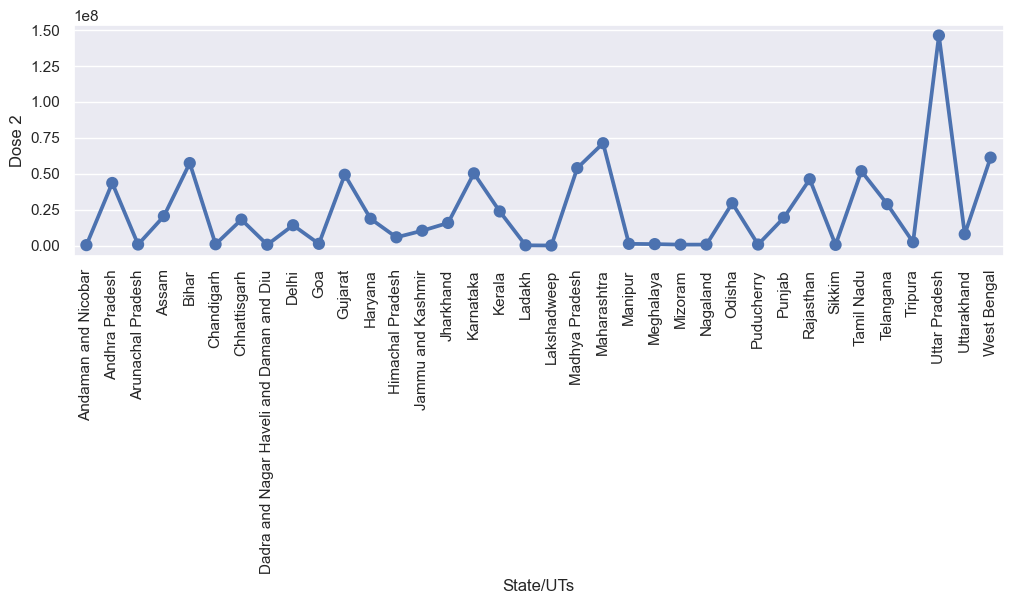

In [169]:
plt.figure(figsize=(12,3))
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Dose 2',data=data)
plt.show()
#plt.savefig('ppltDose.tif')

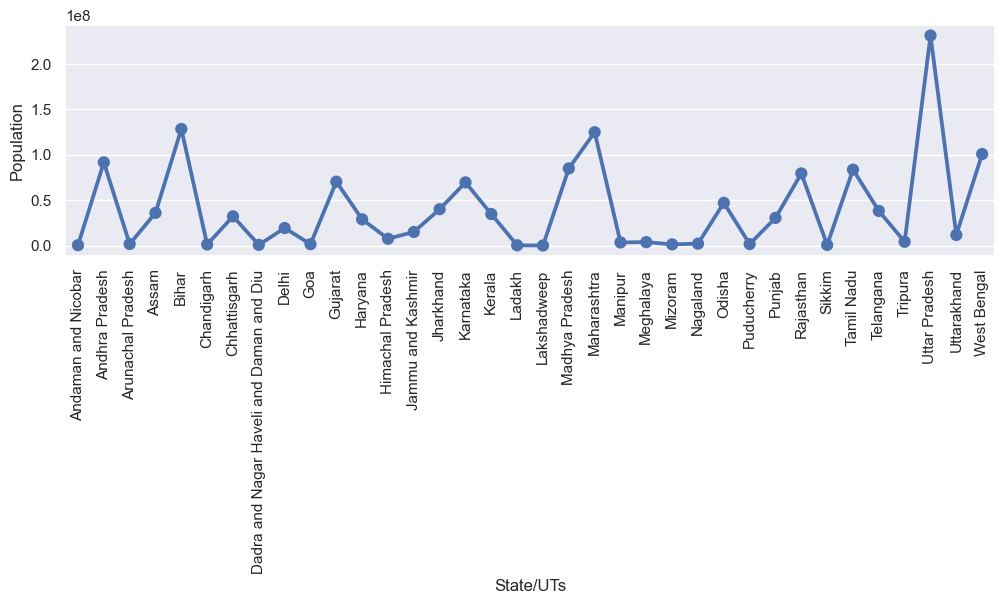

In [170]:
plt.figure(figsize=(12,3))
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Population',data=data)
plt.show()
#plt.savefig('ppltPopulation.tif')

In [171]:
df=data.iloc[:,0:5]
df.head()

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


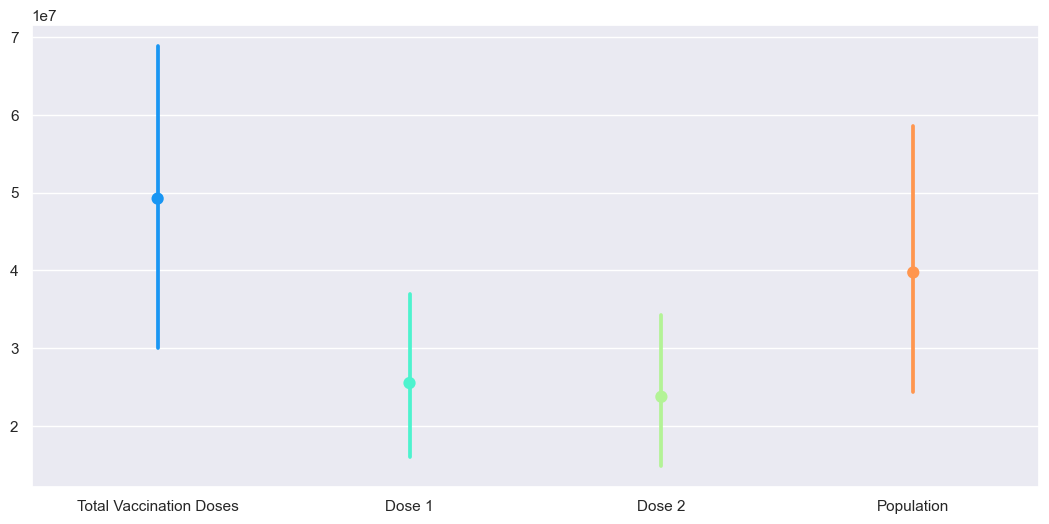

In [172]:
# pointplot of raw data attribute
plt.figure(figsize=(13,6))
sns.pointplot(data=df,palette='rainbow')
plt.show()
#plt.savefig('ppltallattri.tif')

In [173]:
# data for variation analysis
frame = pd.read_csv('COVID-19 India Statewise Vaccine Data.csv')
frame.head()

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


In [174]:
# cleaning dataset
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit  = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] <  lower_limit) & (df_in[col_name] > upper_limit)]

In [175]:
cols = ['Total Vaccination Doses','Dose 1','Dose 2','Population']
Q1 = frame[cols].quantile(0.25)
Q3 = frame[cols].quantile(0.75)
IQR = Q3 - Q1
frame1 = frame[~((frame[cols] < (Q1 - 1.5 * IQR)) |(frame[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
frame1.head()

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


In [176]:
cols = ['Total Vaccination Doses','Dose 1','Dose 2','Population']
Q1 = frame1[cols].quantile(0.25)
Q3 = frame1[cols].quantile(0.75)
IQR = Q3 - Q1
frame2 = frame1[~((frame1[cols] < (Q1 - 1.5 * IQR)) |(frame1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
frame2.head()

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


In [177]:
cols = ['Total Vaccination Doses','Dose 1','Dose 2','Population']
Q1 = frame2[cols].quantile(0.25)
Q3 = frame2[cols].quantile(0.75)
IQR = Q3 - Q1
frame3 = frame2[~((frame2[cols] < (Q1 - 1.5 * IQR)) |(frame2[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
frame3

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364
5,Chandigarh,2001114,1088086,913028,1158040
6,Chhattisgarh,36927545,18855121,18072424,32199722
7,Dadra and Nagar Haveli and Daman and Diu,1319914,729023,590891,773997
8,Delhi,30710281,16555043,14155238,19301096
9,Goa,2572559,1353009,1219550,1521992


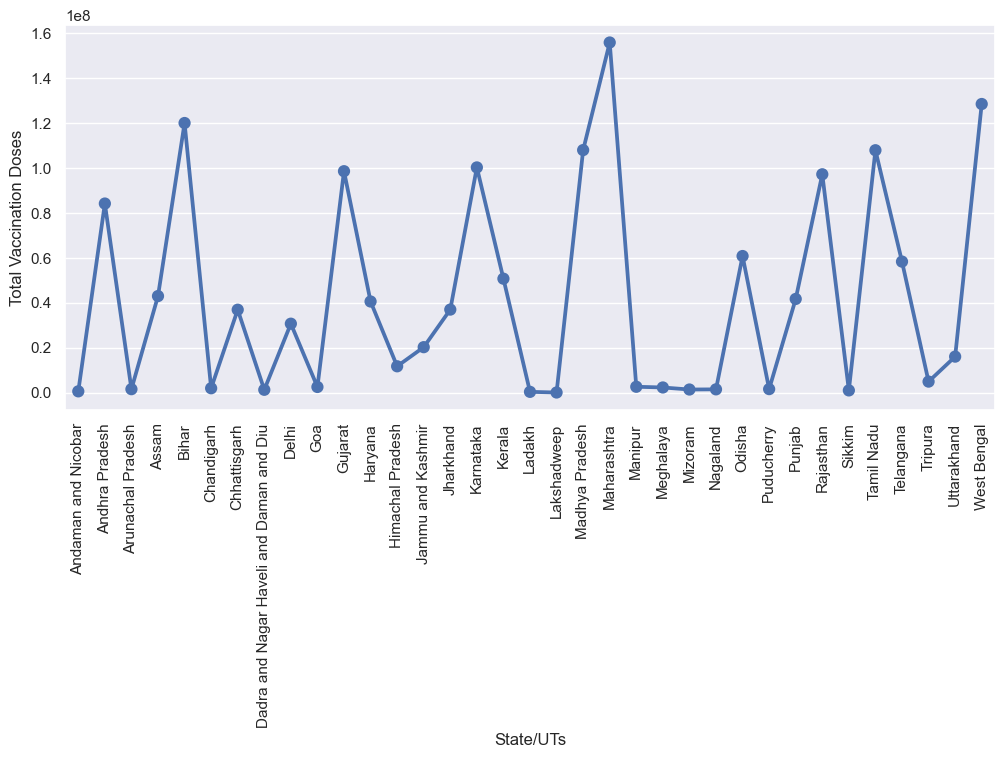

In [178]:
# pointplot of clean dataset
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Total Vaccination Doses',data=frame3)
plt.show()
#plt.savefig('ppltTVDR.tif')

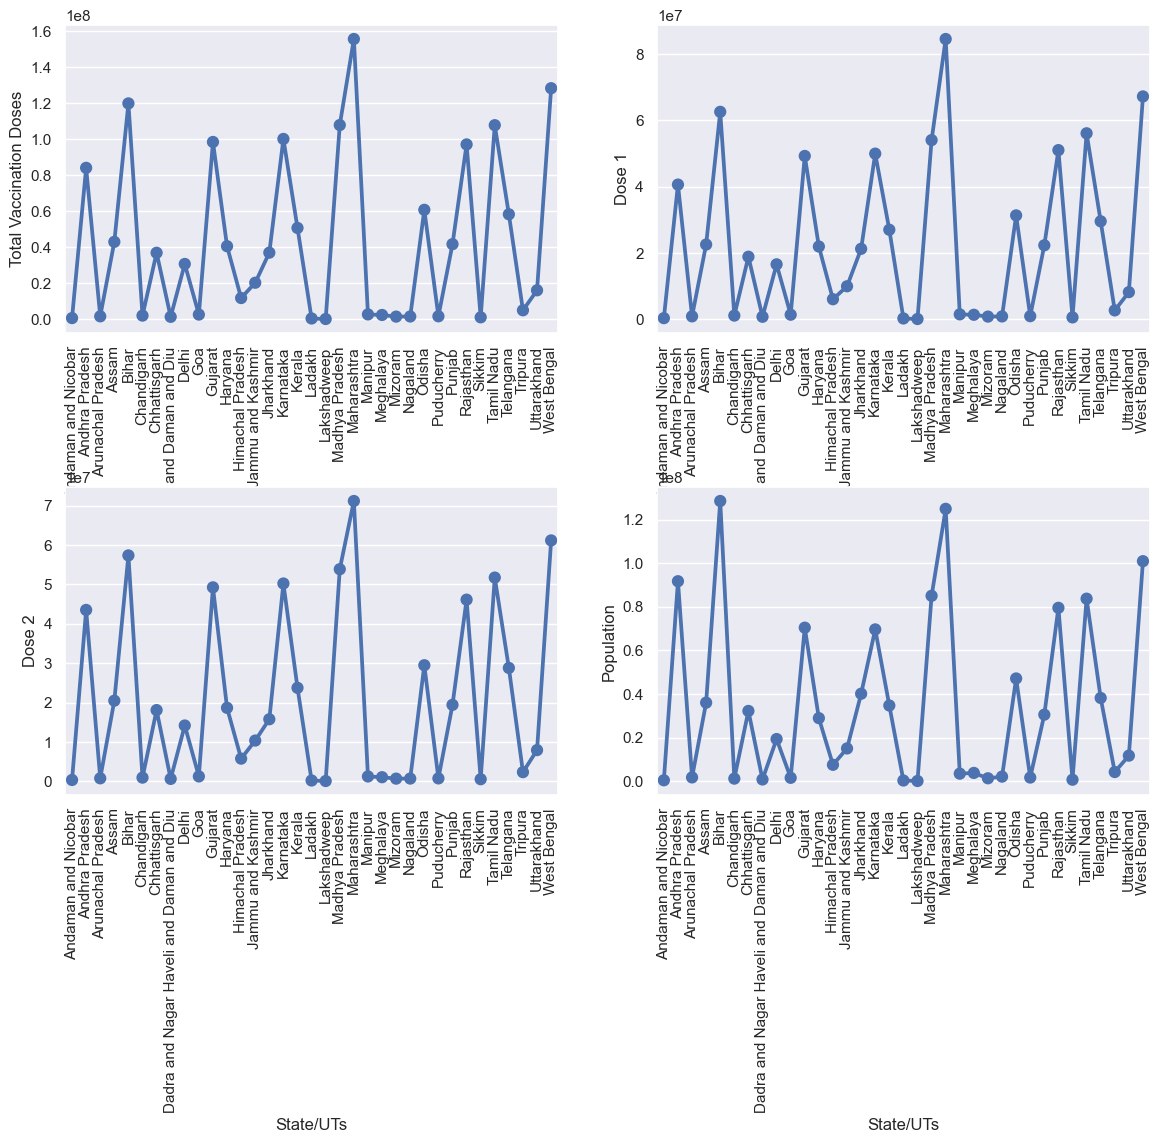

In [179]:
plt.figure(1, figsize=(14,10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.2)

plt.subplot(221)
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Total Vaccination Doses',data=frame3)

plt.subplot(222)
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Dose 1',data=frame3)

plt.subplot(223)
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Dose 2',data=frame3)

plt.subplot(224)
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Population',data=frame3)

plt.show()
#plt.savefig('trimmdata.tif')

In [180]:
# variance of raw dataset
var_data = data.var()
var_data

C:\Users\PHILIP\AppData\Local\Temp\ipykernel_2884\2266532274.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_data = data.var()


Total Vaccination Doses    3.908766e+15
Dose 1                     1.040908e+15
Dose 2                     9.179736e+14
Population                 2.551173e+15
dtype: float64

In [181]:
# variance of clean dataset
var_frame3 = frame3.var()
var_frame3

C:\Users\PHILIP\AppData\Local\Temp\ipykernel_2884\874692191.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_frame3 = frame3.var()


Total Vaccination Doses    2.124584e+15
Dose 1                     5.744927e+14
Dose 2                     4.919213e+14
Population                 1.513502e+15
dtype: float64

In [182]:
# mean of raw dataset 
np.mean(data)

E:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
E:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Total Vaccination Doses    4.921979e+07
Dose 1                     2.549133e+07
Dose 2                     2.372846e+07
Population                 3.971861e+07
dtype: float64

In [183]:
# mean of clean dataset
np.mean(frame3)

Total Vaccination Doses    4.206110e+07
Dose 1                     2.182910e+07
Dose 2                     2.023200e+07
Population                 3.423907e+07
dtype: float64

In [184]:
# correlation between raw data attributes
df.corr()

,Total Vaccination Doses,Dose 1,Dose 2,Population
Total Vaccination Doses,1.000000,0.999384,0.999301,0.987567
Dose 1,0.999384,1.000000,0.997373,0.987123
Dose 2,0.999301,0.997373,1.000000,0.986702
Population,0.987567,0.987123,0.986702,1.000000


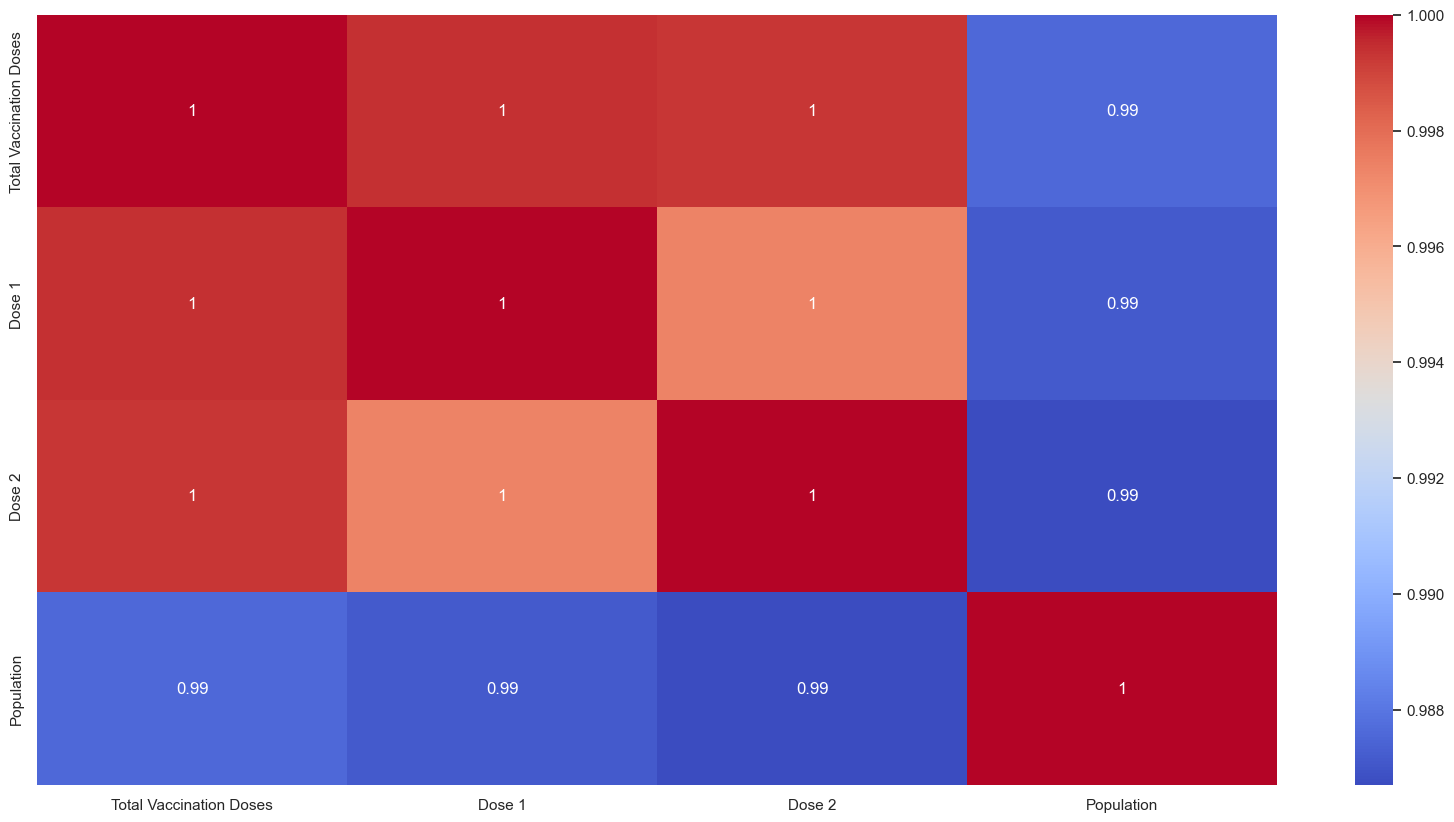

In [185]:
# heatmap correlation between raw data attributes
sns.heatmap(df.corr(), annot = True,  cmap="coolwarm")
plt.show()
#plt.savefig('corr.tif')

<Figure size 1000x1000 with 0 Axes>

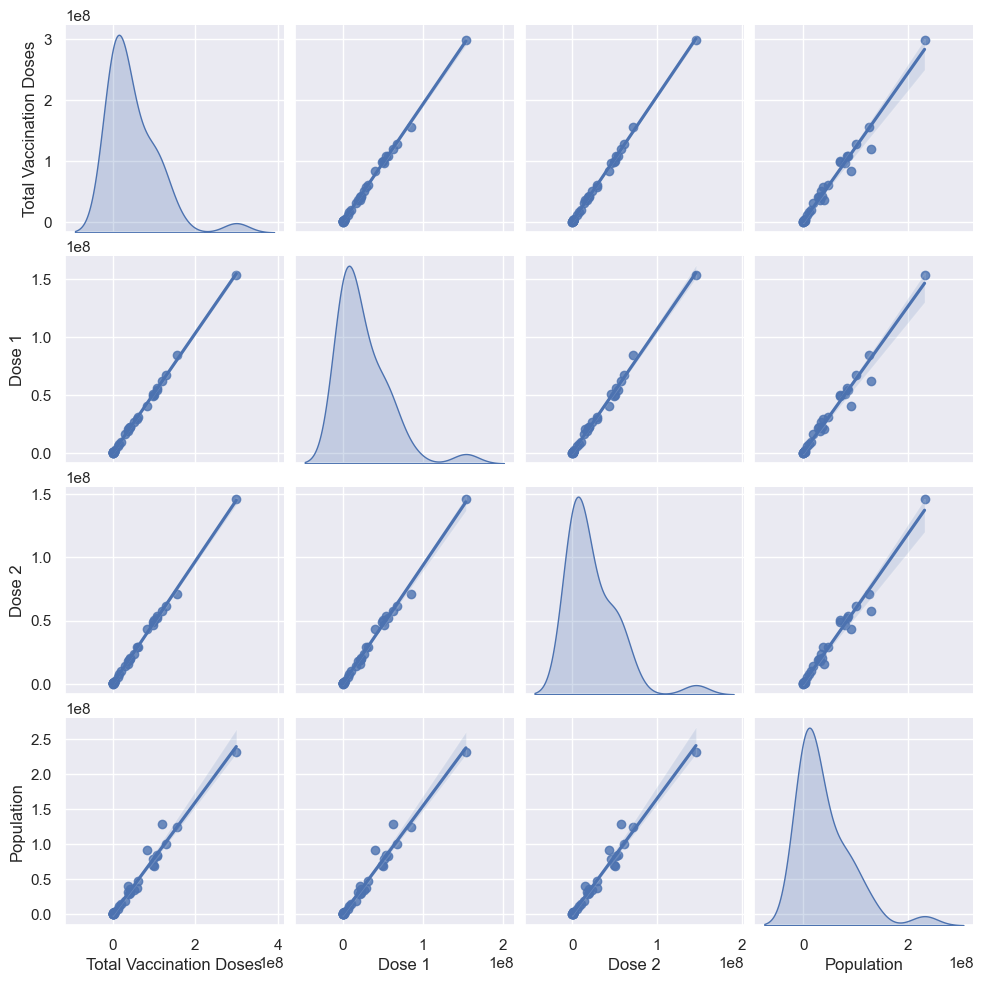

In [186]:
# pairplot showing the regression pattern of raw dataset attributes
plt.figure(figsize=(10,10))
sns.pairplot(df,diag_kind="kde", kind="reg")
plt.show()
#plt.savefig('pairol.tif')

In [187]:
# columns exclusions for analysis of clean dataset attributes
frame4=frame3.iloc[:,0:5]
frame4.head()

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364


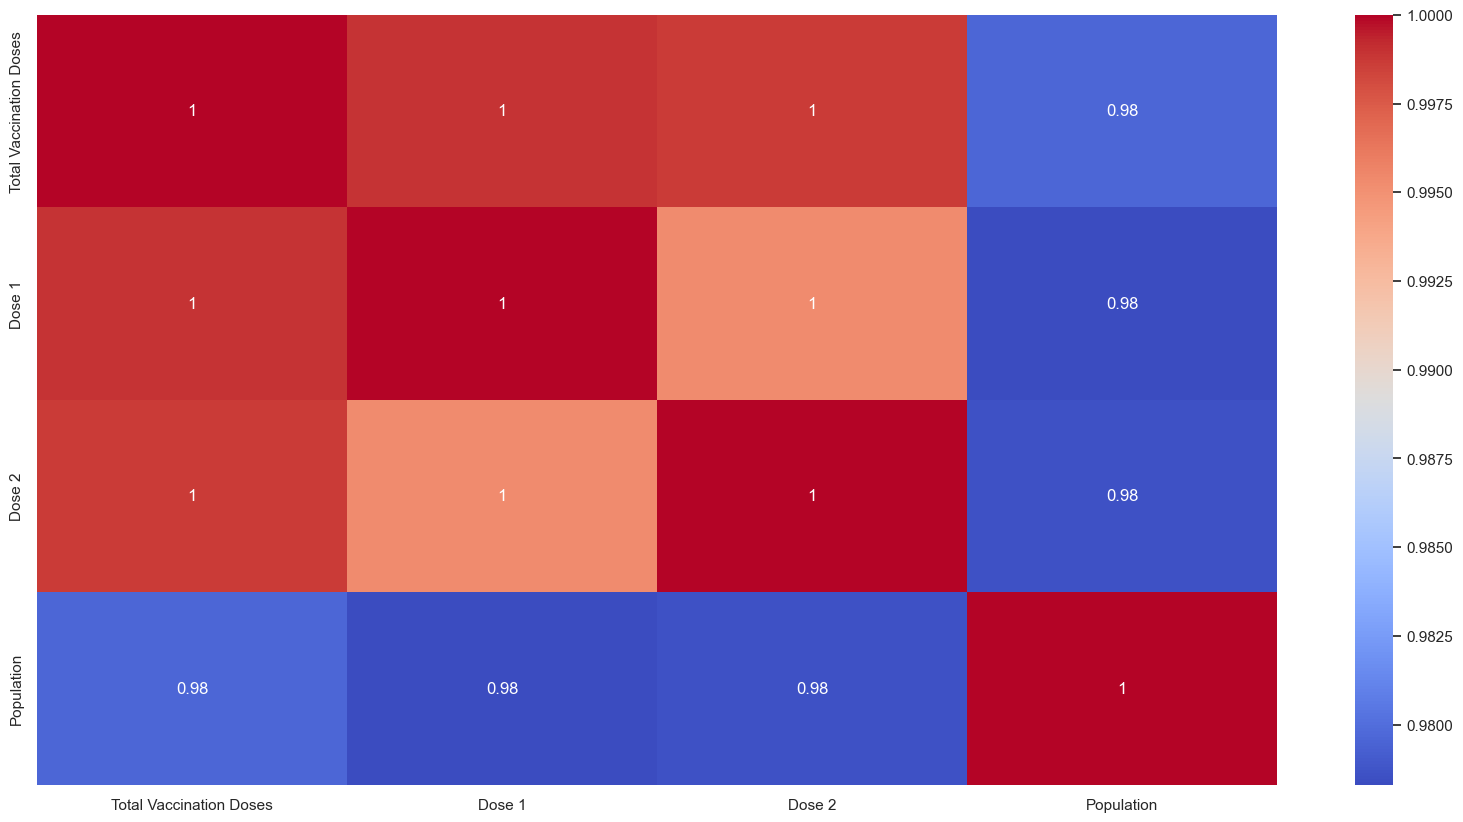

In [188]:
# heatmap of correlation between clean dataset attributes
sns.heatmap(frame4.corr(), annot = True,  cmap="coolwarm")
plt.show()
#plt.savefig('corrwol.tif')

<Figure size 1000x1000 with 0 Axes>

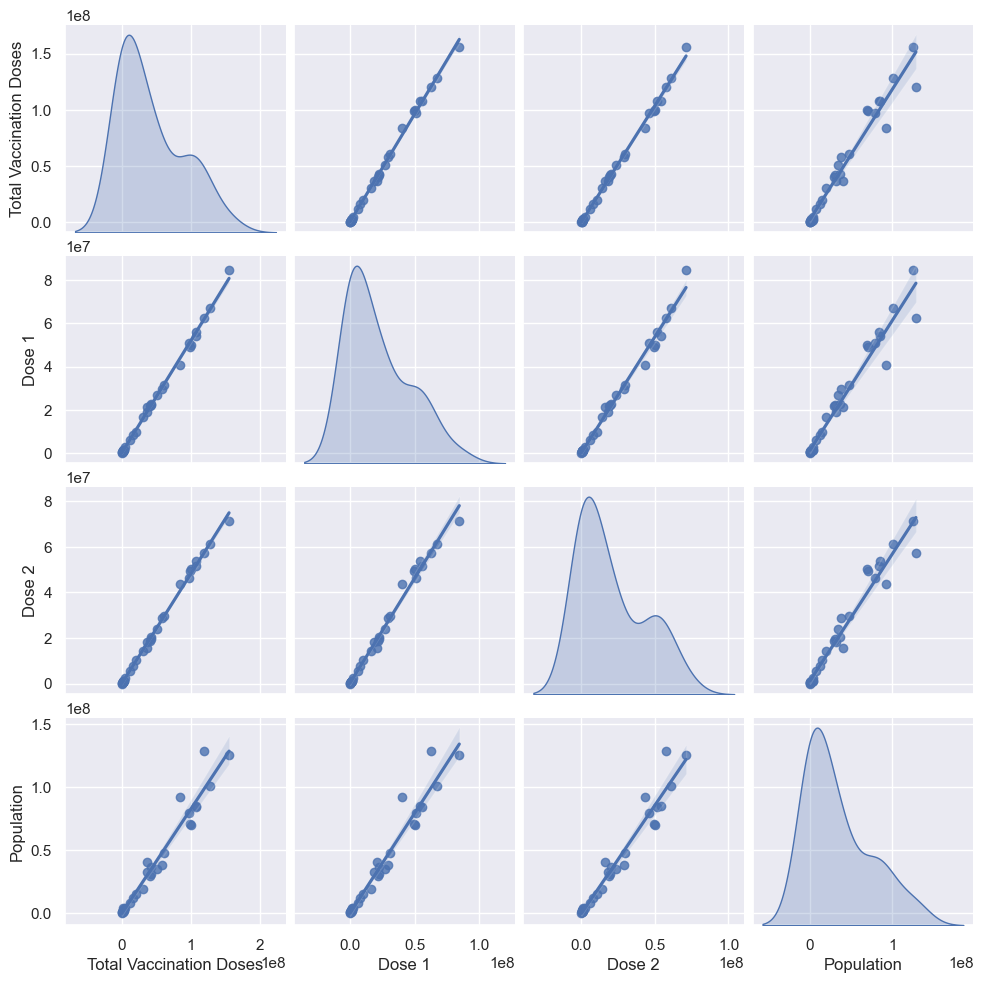

In [189]:
# pairplot showing the regression pattern of clean dataset attributes
plt.figure(figsize=(10,10))
sns.pairplot(frame4,diag_kind="kde", kind="reg")
plt.show()
#plt.savefig('ytyqyq.tif')

In [190]:
# linear regression and relevant features testing
# clean dataset
CD1 = smf.ols('Population ~ Total_Vaccination_Doses', data=covid_3).fit()
print(CD1.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     784.2
Date:                Mon, 29 May 2023   Prob (F-statistic):           1.41e-24
Time:                        21:59:24   Log-Likelihood:                -604.67
No. Observations:                  35   AIC:                             1213.
Df Residuals:                      33   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5

In [191]:
CD2 = smf.ols('Population~ Dose_1', data=covid_3).fit()
print(CD2.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     735.8
Date:                Mon, 29 May 2023   Prob (F-statistic):           3.87e-24
Time:                        21:59:25   Log-Likelihood:                -605.74
No. Observations:                  35   AIC:                             1215.
Df Residuals:                      33   BIC:                             1219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.233e+05   1.88e+06     -0.225      0.8

In [201]:
CD3 = smf.ols('Population~ Dose_2', data=covid_3).fit()
print(CD3.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     745.9
Date:                Mon, 29 May 2023   Prob (F-statistic):           3.12e-24
Time:                        22:31:23   Log-Likelihood:                -605.51
No. Observations:                  35   AIC:                             1215.
Df Residuals:                      33   BIC:                             1218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.891e+05   1.87e+06     -0.261      0.7

In [193]:
CD4 = smf.ols('Population ~Total_Vaccination_Doses+Dose_1+Dose_2', data=covid_3).fit()
print(CD4.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     380.4
Date:                Mon, 29 May 2023   Prob (F-statistic):           4.96e-23
Time:                        21:59:25   Log-Likelihood:                -604.66
No. Observations:                  35   AIC:                             1215.
Df Residuals:                      32   BIC:                             1220.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


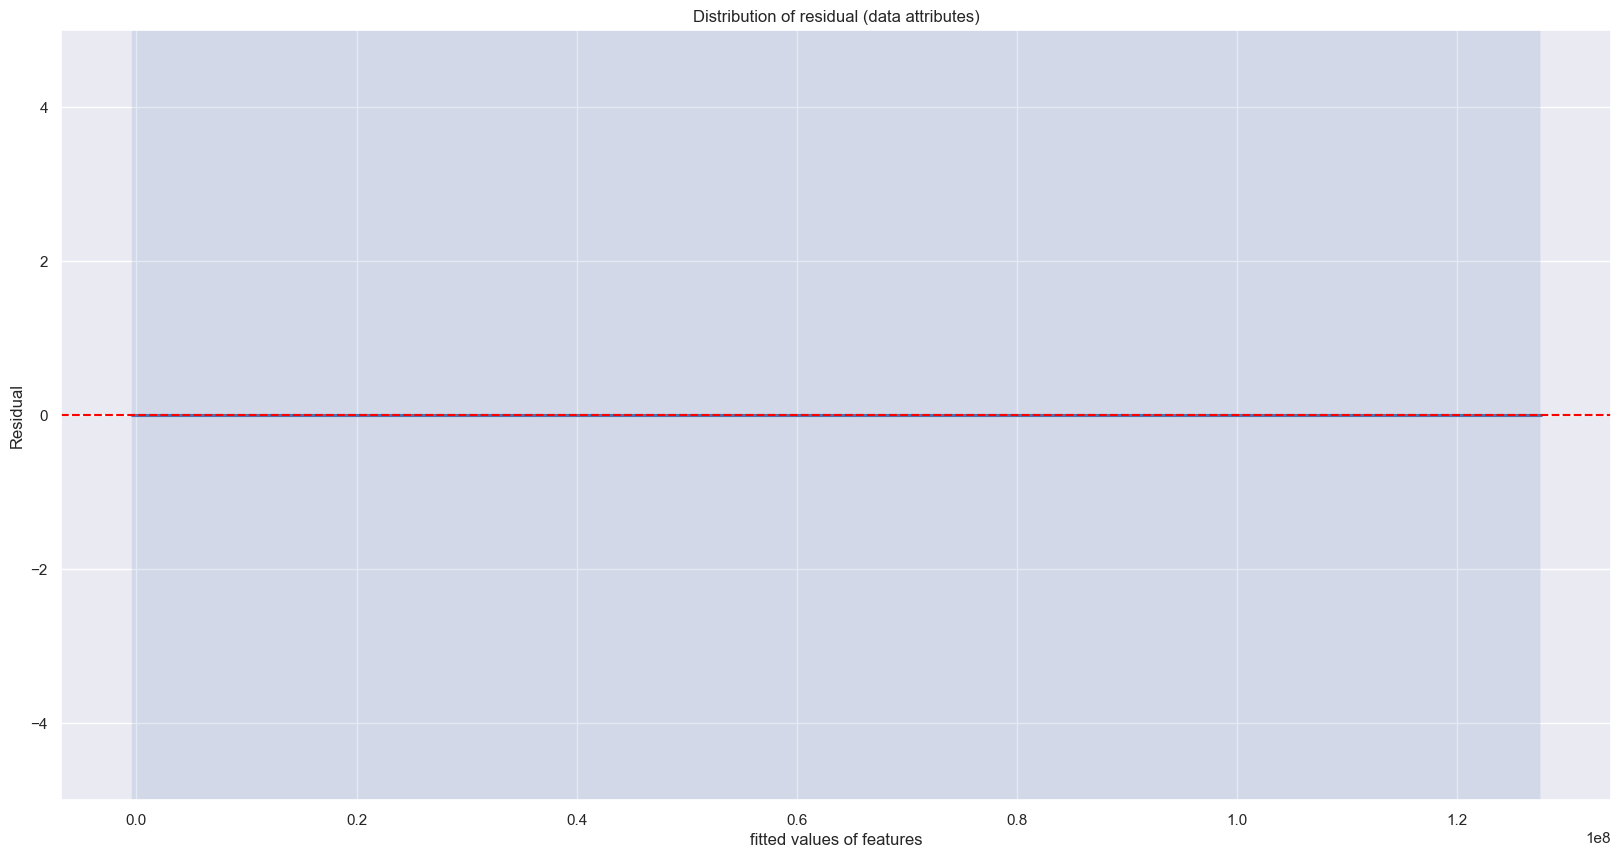

In [194]:
# residual plot of clean dataset attributes
plt.ylim(-5,5)
sns.regplot(CD4.fittedvalues, CD4.resid)
plt.axhline(y = 0,linewidth = 1.5,linestyle = 'dashed',color = 'red')
plt.xlabel('fitted values of features')
plt.ylabel('Residual')
plt.title('Distribution of residual (data attributes)')
plt.show()
#plt.savefig('rsda.tif')

In [195]:
# multiple regression of raw dataset and relevant features testing
# data attributes
string_cols = ' + '.join(covid.columns[1:4])
string_cols

'Total_Vaccination_Doses + Dose_1 + Dose_2'

In [196]:
M_reg = smf.ols('Population~ {}'.format(string_cols),data = covid).fit()
print(M_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     651.8
Date:                Mon, 29 May 2023   Prob (F-statistic):           2.99e-27
Time:                        21:59:26   Log-Likelihood:                -622.51
No. Observations:                  36   AIC:                             1251.
Df Residuals:                      33   BIC:                             1256.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


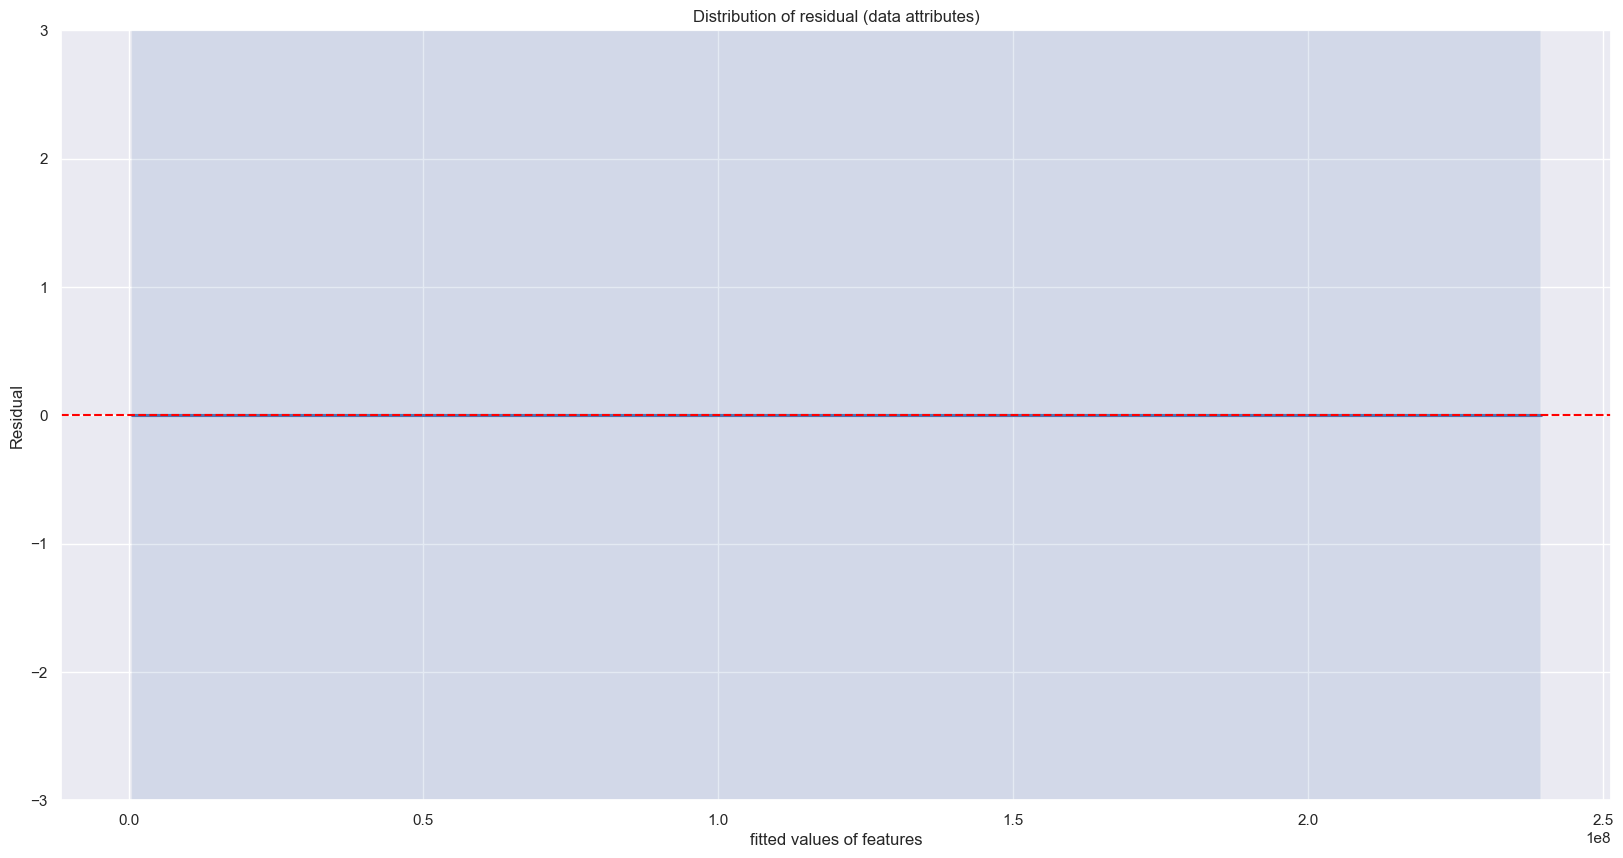

In [197]:
# residual plot of raw dataset attributes
plt.ylim(-3,3)
sns.regplot(M_reg.fittedvalues, M_reg.resid)
plt.axhline(y = 0,linewidth = 1.5,linestyle = 'dashed',color = 'red')
plt.xlabel('fitted values of features')
plt.ylabel('Residual')
plt.title('Distribution of residual (data attributes)')
plt.show()
#plt.savefig('rsdard.tif')

In [58]:
# Hypothesis testing and assumption checking

In [59]:
# data normality test
# H0:The data follow the normal distribution
# H1: The data do not follow the normal distribution
import scipy.stats as stats

In [60]:
# normality test for total cases
chi2,p=stats.normaltest(frame3['Total Vaccination Doses'])
print('chi2=%.2f,pvalue=%.3f'%(chi2,p))
stats.anderson(frame3['Total Vaccination Doses'],dist='norm')

chi2=4.95,pvalue=0.084


AndersonResult(statistic=2.1356373653821876, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [61]:
def plotvariale(df,variable):
    plt.figure(figsize=(10,5))
    plt.subplots_adjust(wspace=0.5)
    plt.subplot(121)
    df[variable].hist(bins=25)
    
    ## QQ plot
    plt.subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

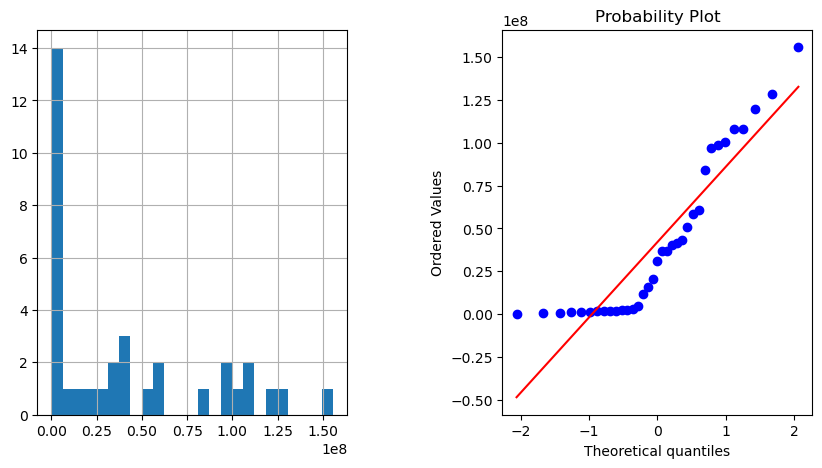

In [62]:
plotvariale(frame3,'Total Vaccination Doses')

In [63]:
# normality test for Dose 1
chi2,p=stats.normaltest(frame3['Dose 1'])
print('chi2=%.2f,pvalue=%.3f'%(chi2,p))
stats.anderson(frame3['Dose 1'],dist='norm')

chi2=5.33,pvalue=0.070


AndersonResult(statistic=2.0293549255532355, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

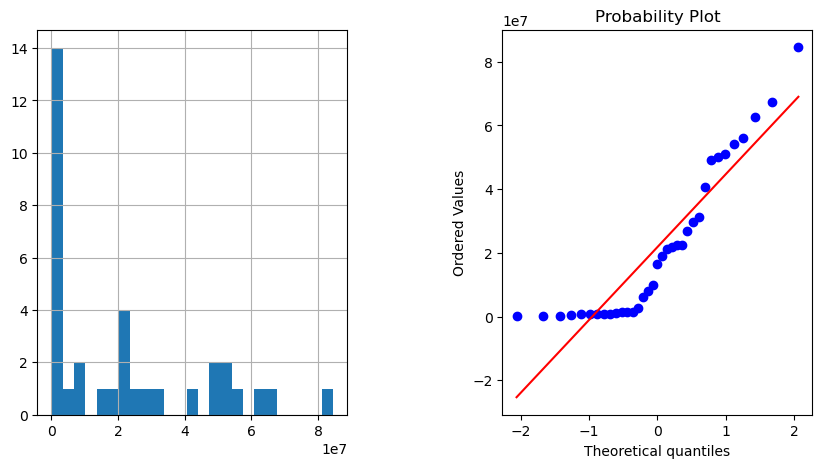

In [64]:
plotvariale(frame3,'Dose 1')

In [65]:
# normality test for Dose 2
chi2,p=stats.normaltest(frame3['Dose 2'])
print('chi2=%.2f,pvalue=%.3f'%(chi2,p))
stats.anderson(frame3['Dose 2'],dist='norm')

chi2=5.21,pvalue=0.074


AndersonResult(statistic=2.2655516183350244, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

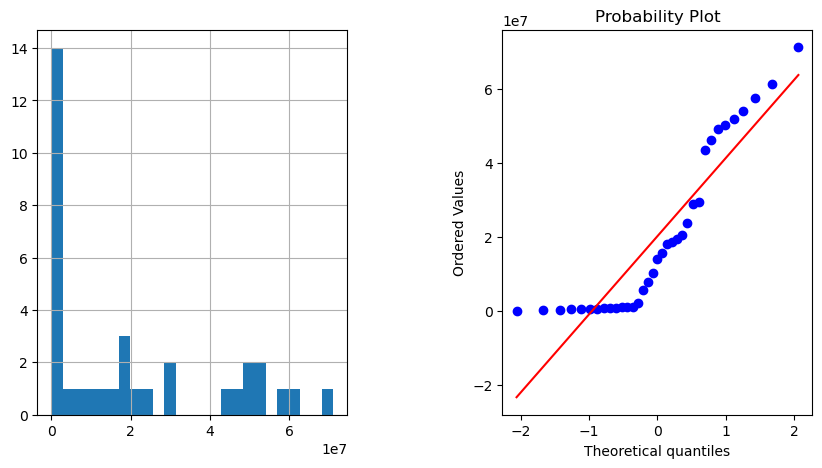

In [66]:
plotvariale(frame3,'Dose 2')

In [67]:
# normality test for Population
chi2,p=stats.normaltest(frame3['Population'])
print('chi2=%.2f,pvalue=%.3f'%(chi2,p))
stats.anderson(frame3['Population'],dist='norm')

chi2=6.26,pvalue=0.044


AndersonResult(statistic=2.246012521346131, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

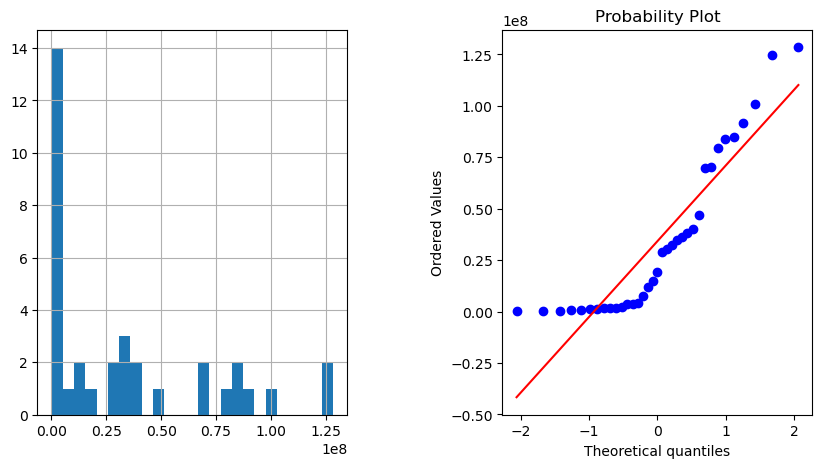

In [68]:
plotvariale(frame3,'Population')

In [69]:
# data transformation for normal distribution

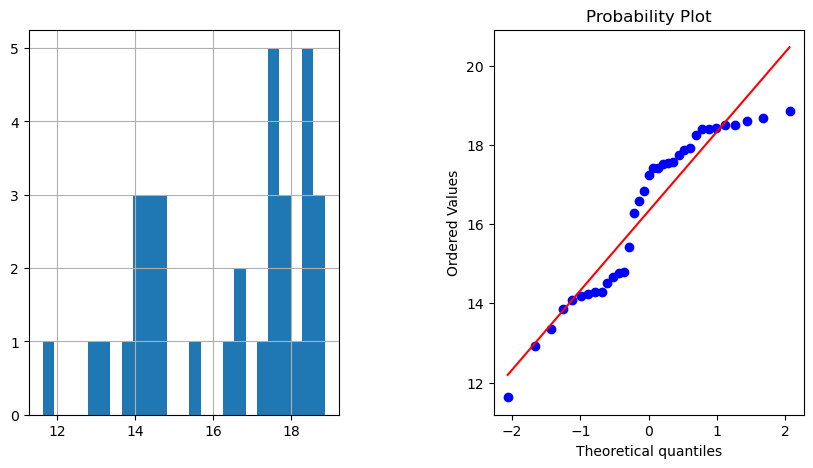

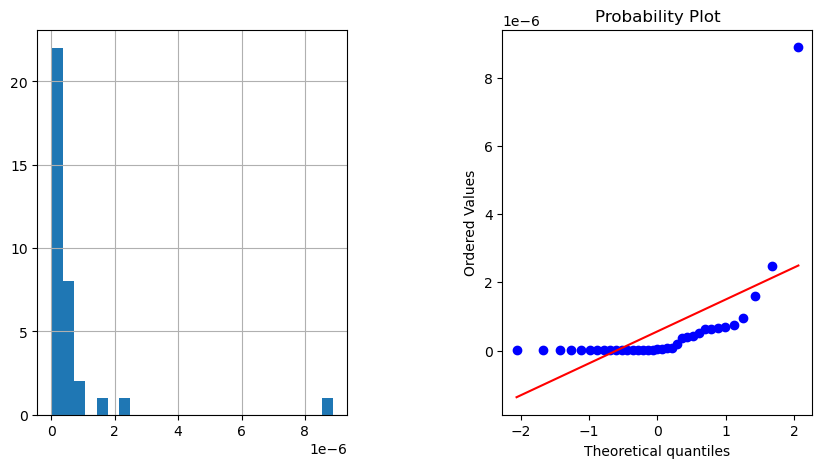

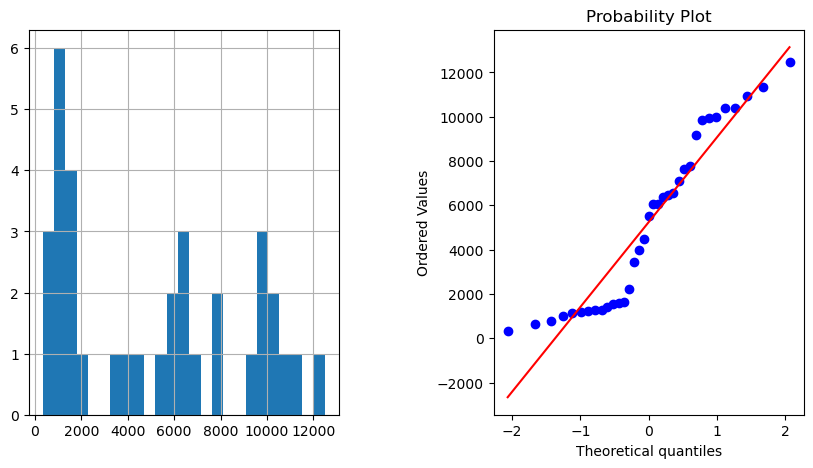

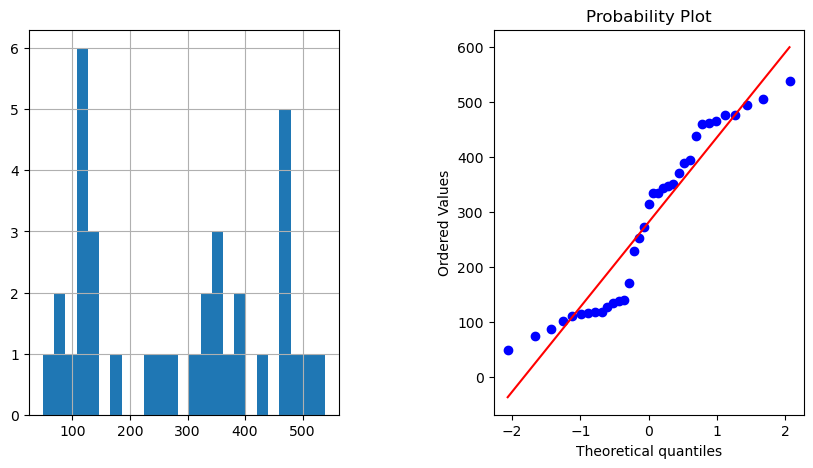

selected value for lambda is 0.1724923774572535


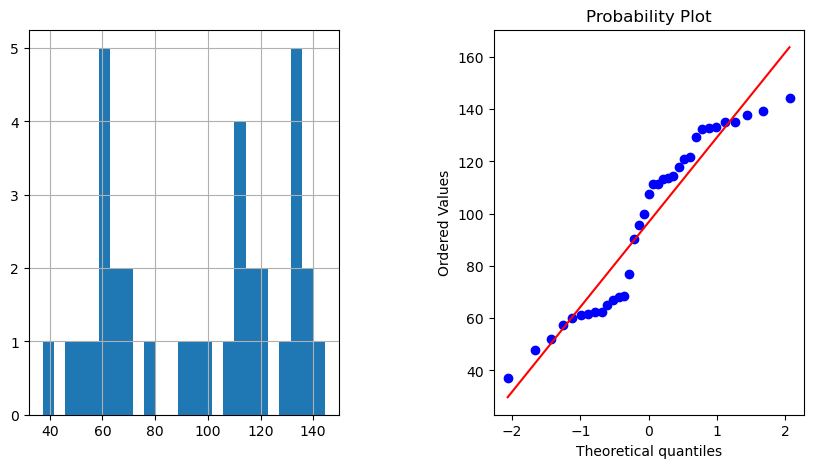

In [70]:
# for Total Vaccination Doses

# log transformation
frame3["Total Vaccination Doses_log"]=np.log(frame["Total Vaccination Doses"])
plotvariale(frame3,'Total Vaccination Doses_log')

# inverse/reciprocal transformation
frame3["Total Vaccination Doses_inv"]= 1/frame["Total Vaccination Doses"]
plotvariale(frame3,'Total Vaccination Doses_inv')

# square root transformation
frame3["Total Vaccination Doses_sqroot"]= frame["Total Vaccination Doses"]**(1/2)
plotvariale(frame3,'Total Vaccination Doses_sqroot')

# exponential transformation
frame3["Total Vaccination Doses_cbroot"]= frame["Total Vaccination Doses"]**(1/3)
plotvariale(frame3,'Total Vaccination Doses_cbroot')

# boxcox transformation
frame3["Total Vaccination Doses_boxcox"], lambdavalue=stats.boxcox(frame3["Total Vaccination Doses"])
print ("selected value for lambda is", lambdavalue)
plotvariale(frame3,"Total Vaccination Doses_boxcox")

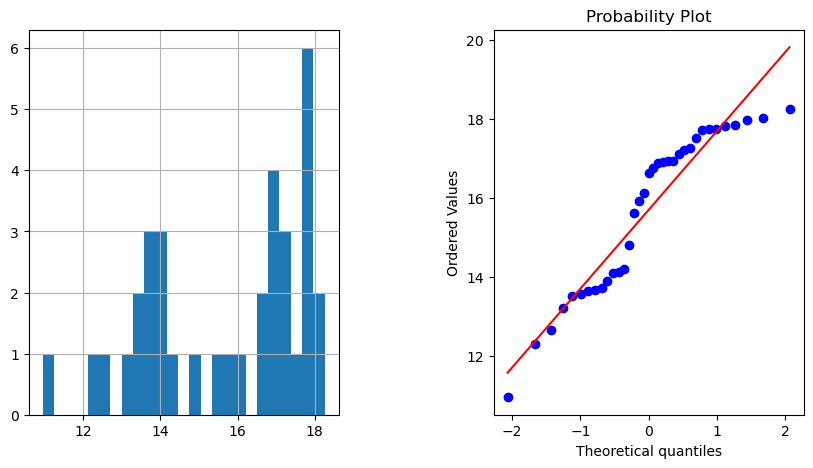

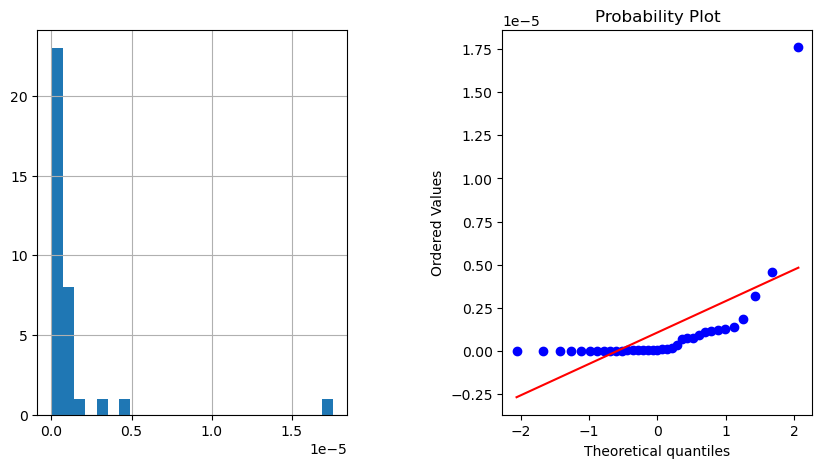

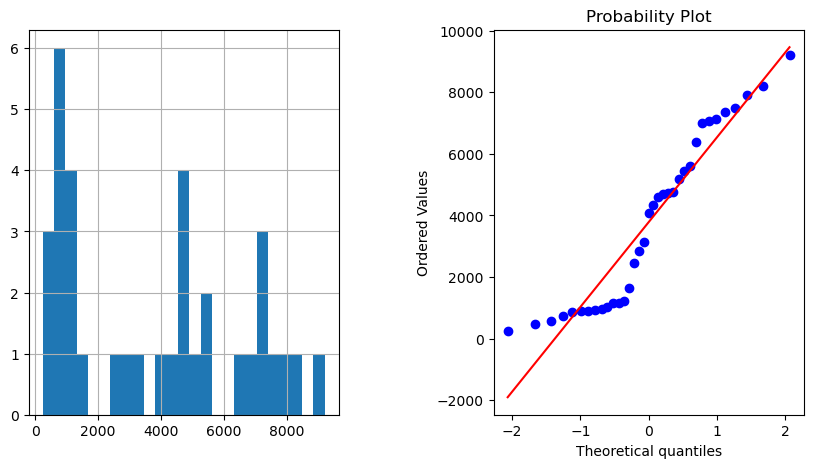

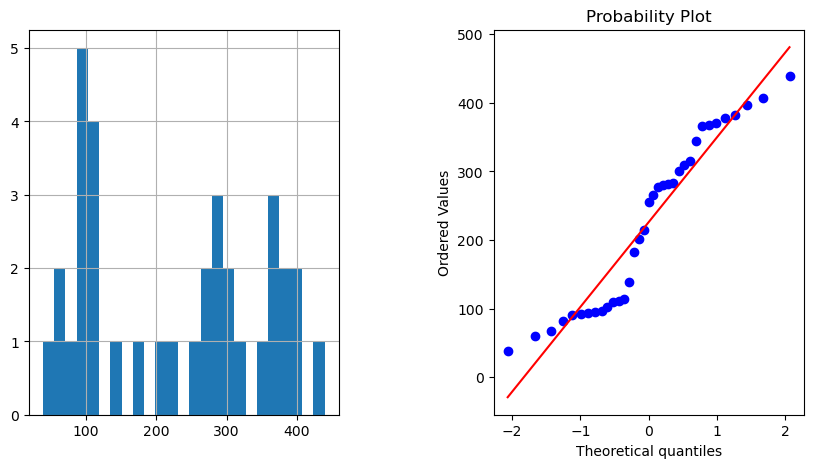

selected value for lambda is 0.17562538639805084


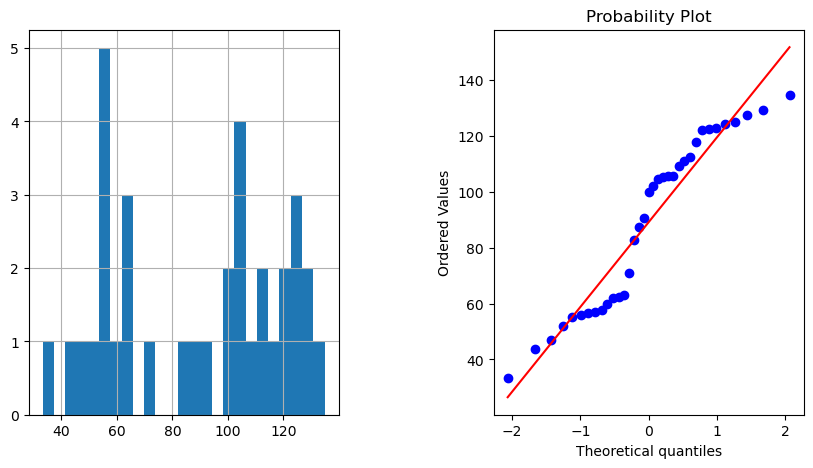

In [71]:
# for Dose 1

# log transformation
frame3["Dose 1_log"]=np.log(frame["Dose 1"])
plotvariale(frame3,'Dose 1_log')

# inverse/reciprocal transformation
frame3["Dose 1_inv"]= 1/frame["Dose 1"]
plotvariale(frame3,'Dose 1_inv')

# square root transformation
frame3["Dose 1_sqroot"]= frame["Dose 1"]**(1/2)
plotvariale(frame3,'Dose 1_sqroot')

# exponential transformation
frame3["Dose 1_cbroot"]= frame["Dose 1"]**(1/3)
plotvariale(frame3,'Dose 1_cbroot')

# boxcox transformation
frame3["Dose 1_boxcox"], lambdavalue=stats.boxcox(frame3["Dose 1"])
print ("selected value for lambda is", lambdavalue)
plotvariale(frame3,"Dose 1_boxcox")

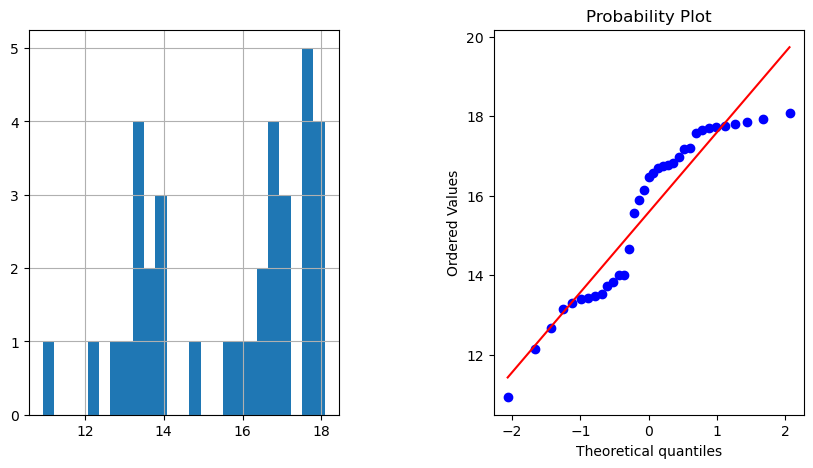

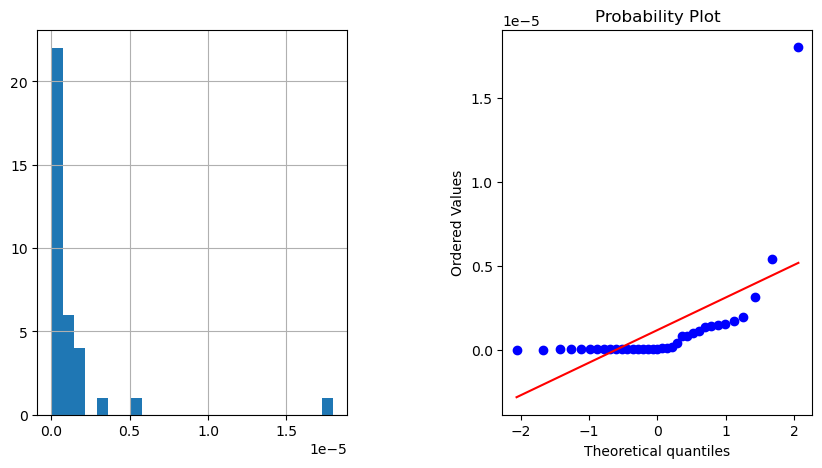

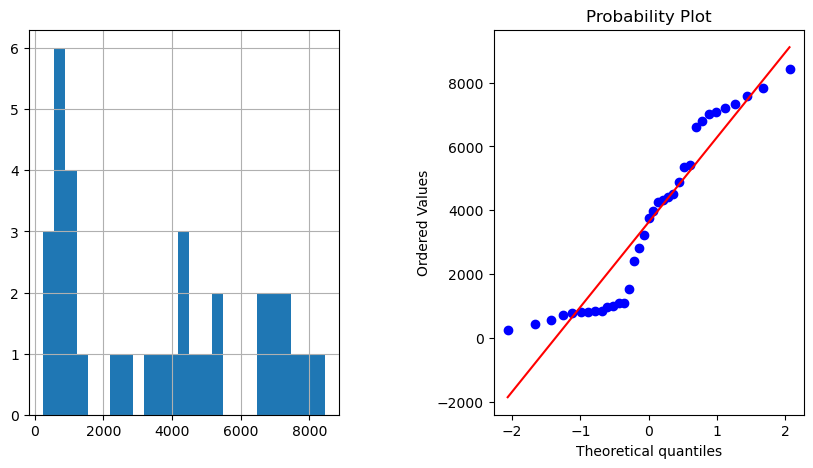

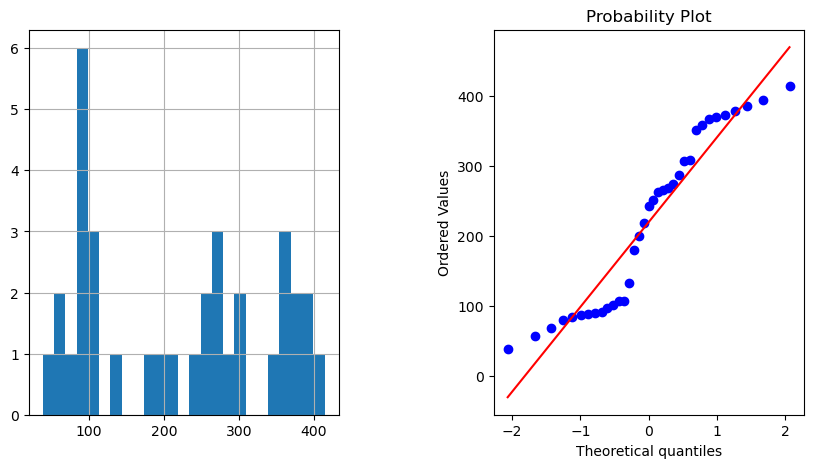

selected value for lambda is 0.16834387819678653


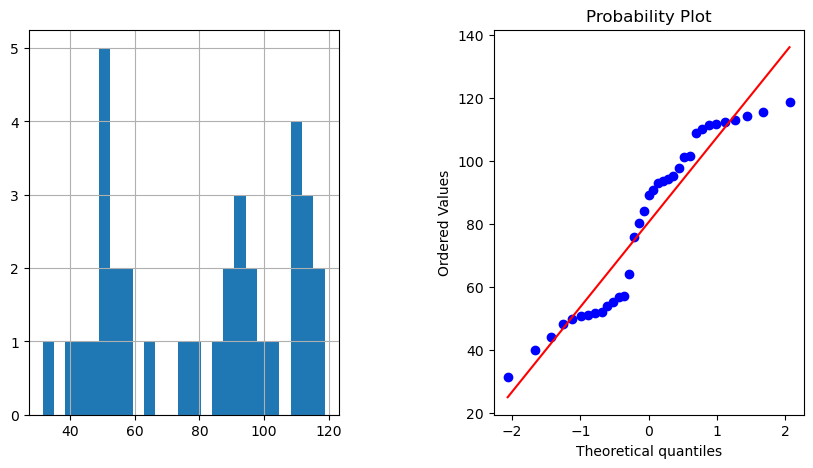

In [72]:
# for Dose 2

# log transformation
frame3["Dose 2_log"]=np.log(frame["Dose 2"])
plotvariale(frame3,'Dose 2_log')

# inverse/reciprocal transformation
frame3["Dose 2_inv"]= 1/frame["Dose 2"]
plotvariale(frame3,'Dose 2_inv')

# square root transformation
frame3["Dose 2_sqroot"]= frame["Dose 2"]**(1/2)
plotvariale(frame3,'Dose 2_sqroot')

# exponential transformation
frame3["Dose 2_cbroot"]= frame["Dose 2"]**(1/3)
plotvariale(frame3,'Dose 2_cbroot')

# boxcox transformation
frame3["Dose 2_boxcox"], lambdavalue=stats.boxcox(frame3["Dose 2"])
print ("selected value for lambda is", lambdavalue)
plotvariale(frame3,"Dose 2_boxcox")

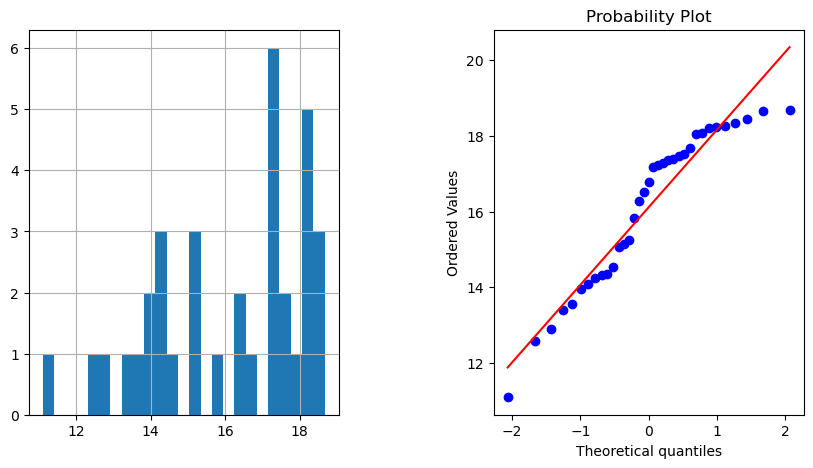

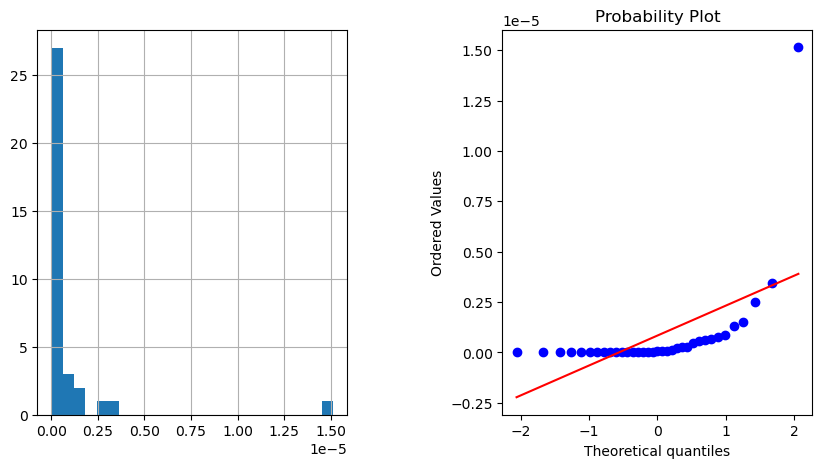

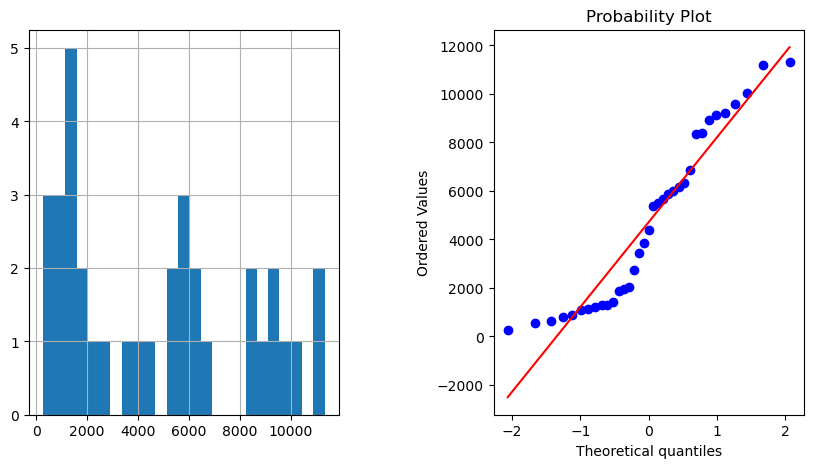

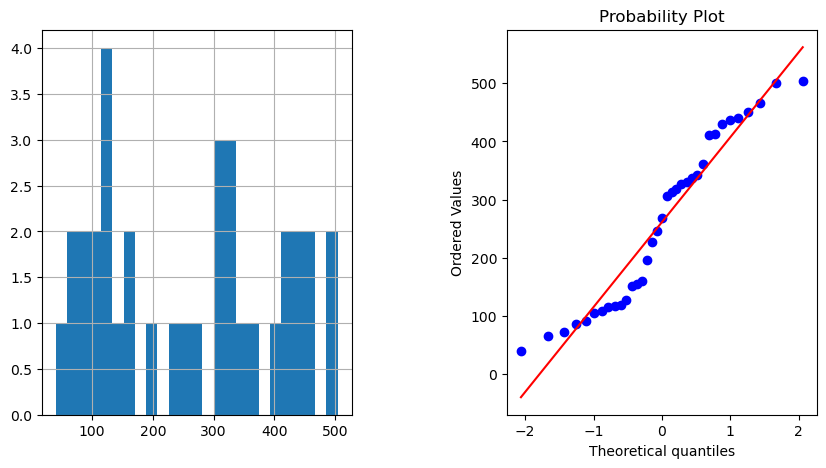

selected value for lambda is 0.17515878965916545


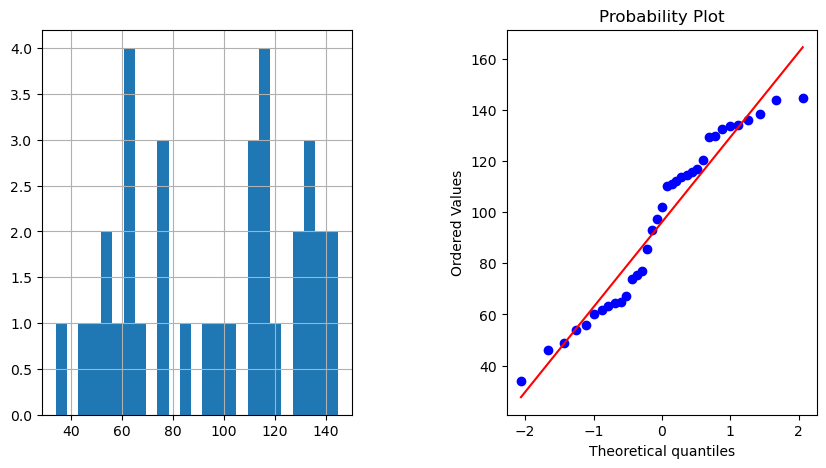

In [73]:
# for Population

# log transformation
frame3["Population_log"]=np.log(frame["Population"])
plotvariale(frame3,'Population_log')

# inverse/reciprocal transformation
frame3["Population_inv"]= 1/frame["Population"]
plotvariale(frame3,'Population_inv')

# square root transformation
frame3["Population_sqroot"]= frame["Population"]**(1/2)
plotvariale(frame3,'Population_sqroot')

# exponential transformation
frame3["Population_cbroot"]= frame["Population"]**(1/3)
plotvariale(frame3,'Population_cbroot')

# boxcox transformation
frame3["Population_boxcox"], lambdavalue=stats.boxcox(frame3["Population"])
print ("selected value for lambda is", lambdavalue)
plotvariale(frame3,"Population_boxcox")

In [74]:
# statistical inferences
# 2-sample t-test

In [75]:
%matplotlib inline
np.random.seed(8)
rcParams['figure.figsize']=20,10
rcParams['font.size']=30
sns.set()

In [76]:
def plot_distribution(inp):
    plt.figure()
    ax=sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_=plt.ylim()
    plt.text(inp.mean()+inp.mean()/10,max_-max_/10, "mean:{:.2f}".format(inp.mean()),)
    return plt.figure

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


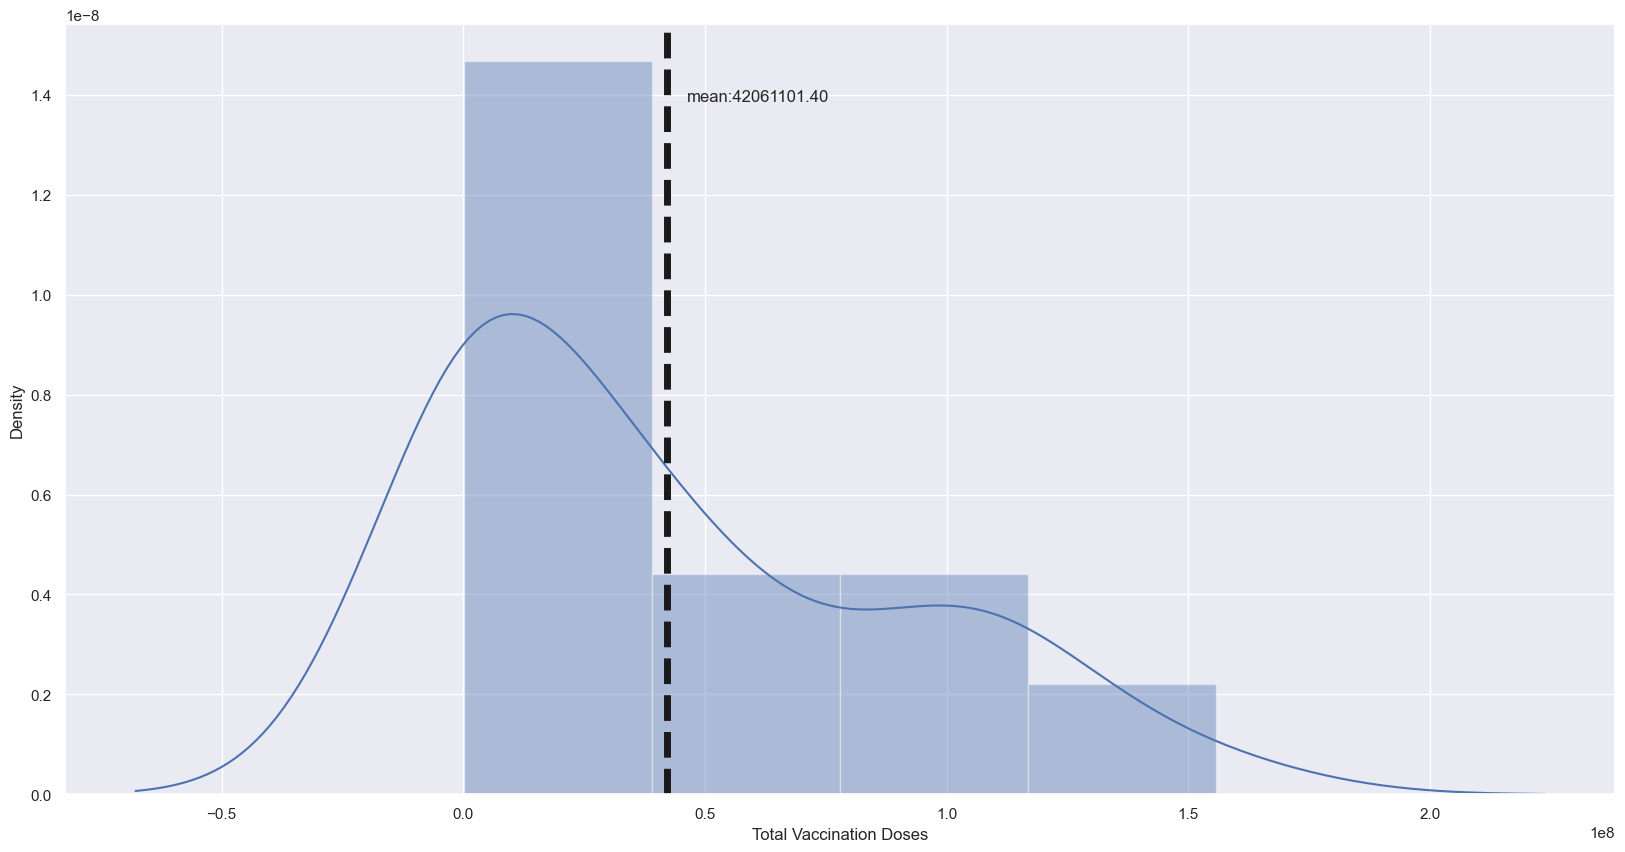

In [77]:
plot_distribution(frame3['Total Vaccination Doses'])
plt.savefig('mtc.tif')

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


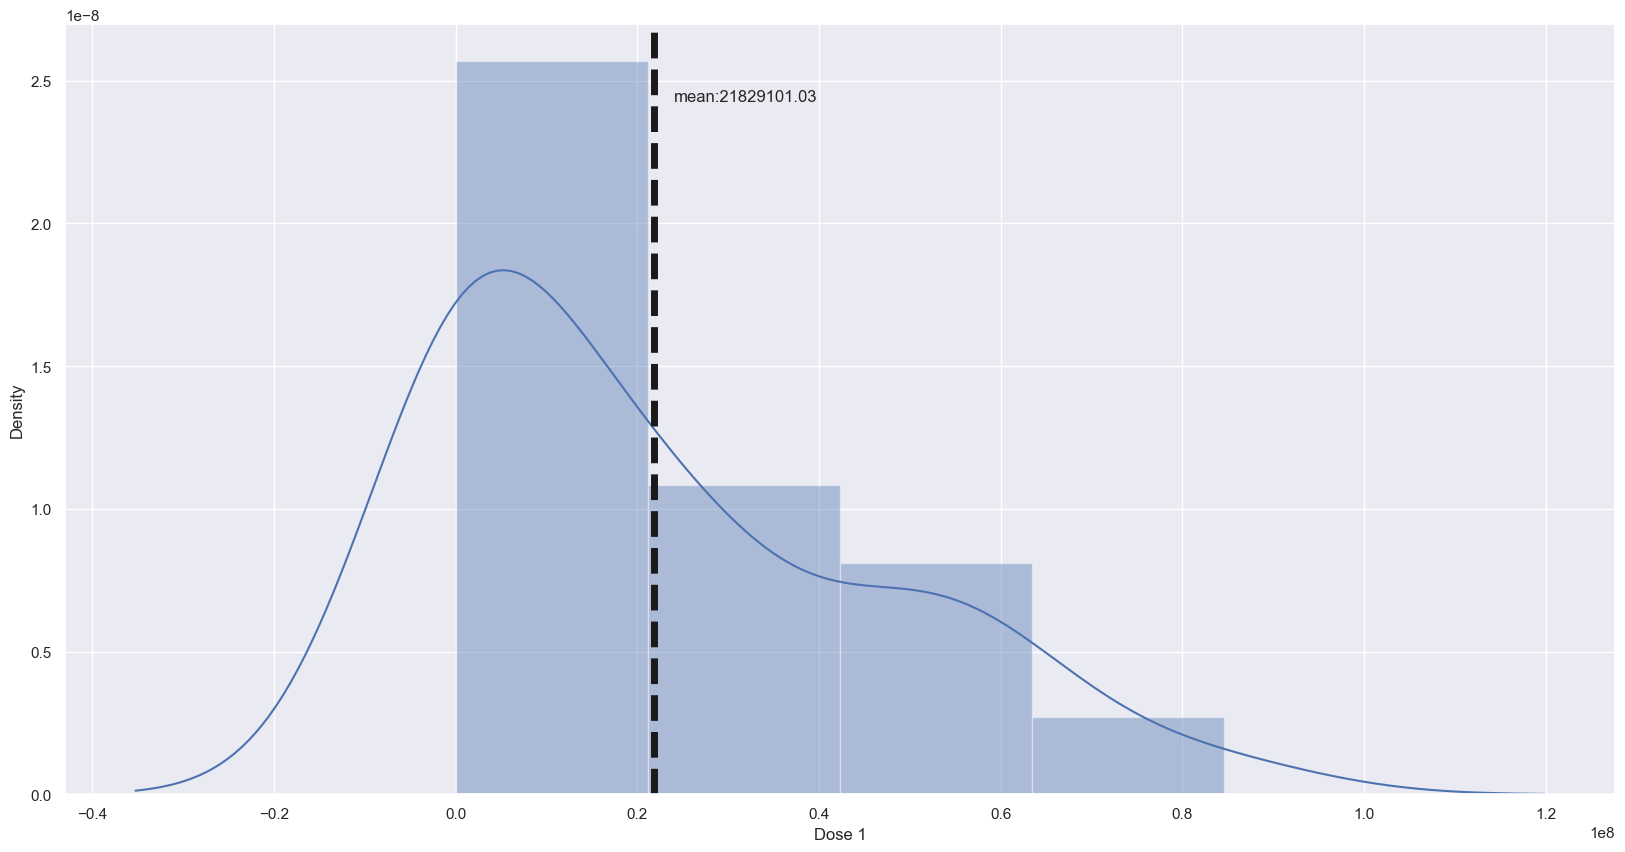

In [78]:
plot_distribution(frame3['Dose 1'])
plt.savefig('ma.tif')

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


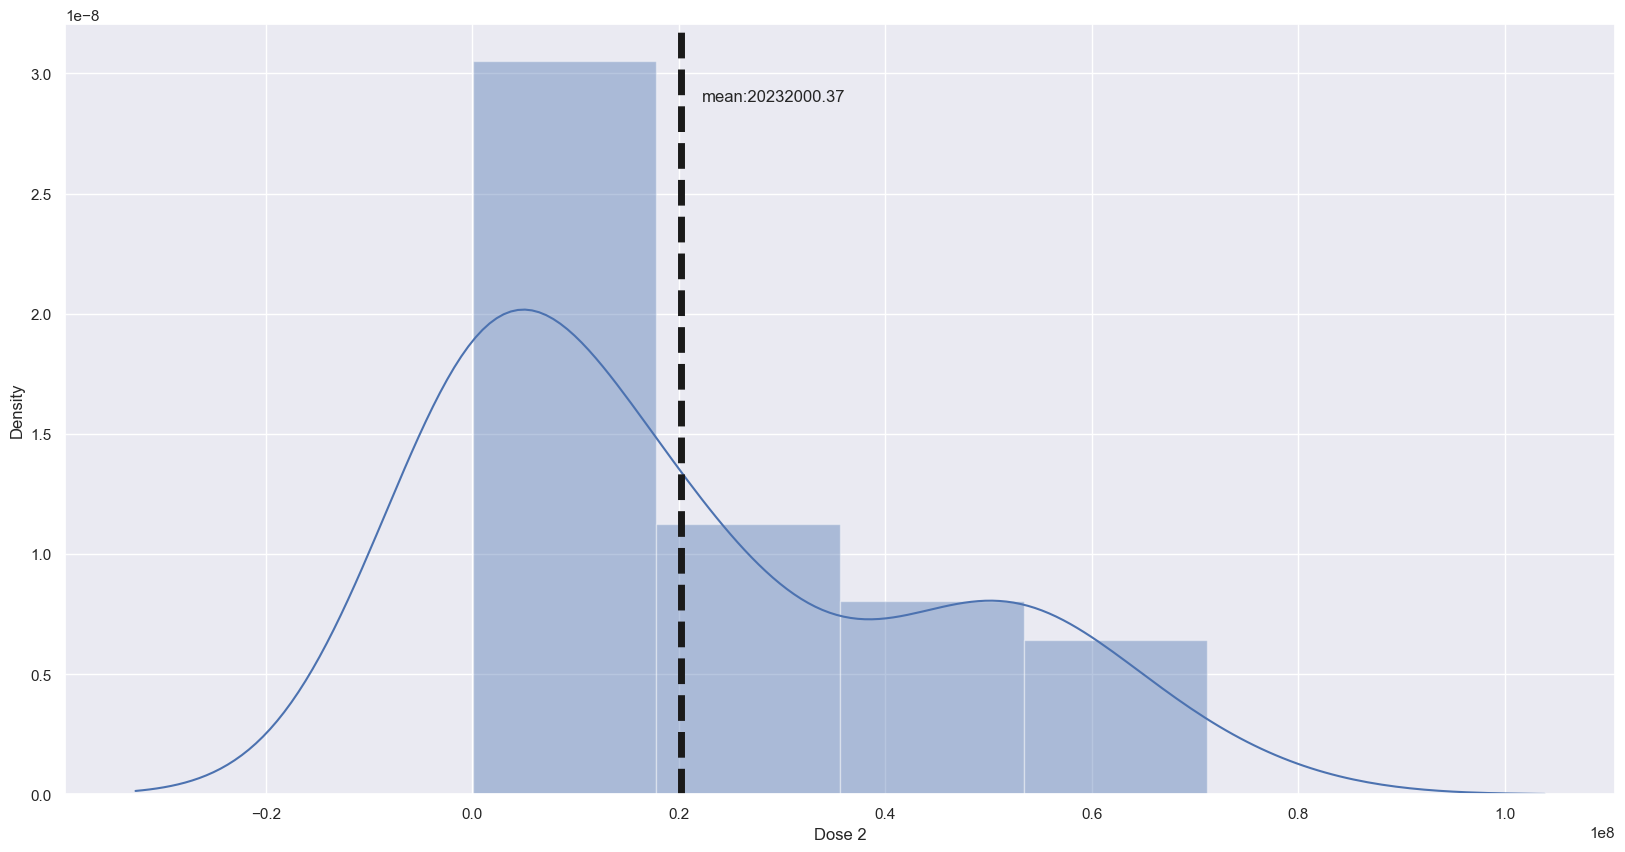

In [79]:
plot_distribution(frame3['Dose 2'])
plt.savefig('ma.tif')

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


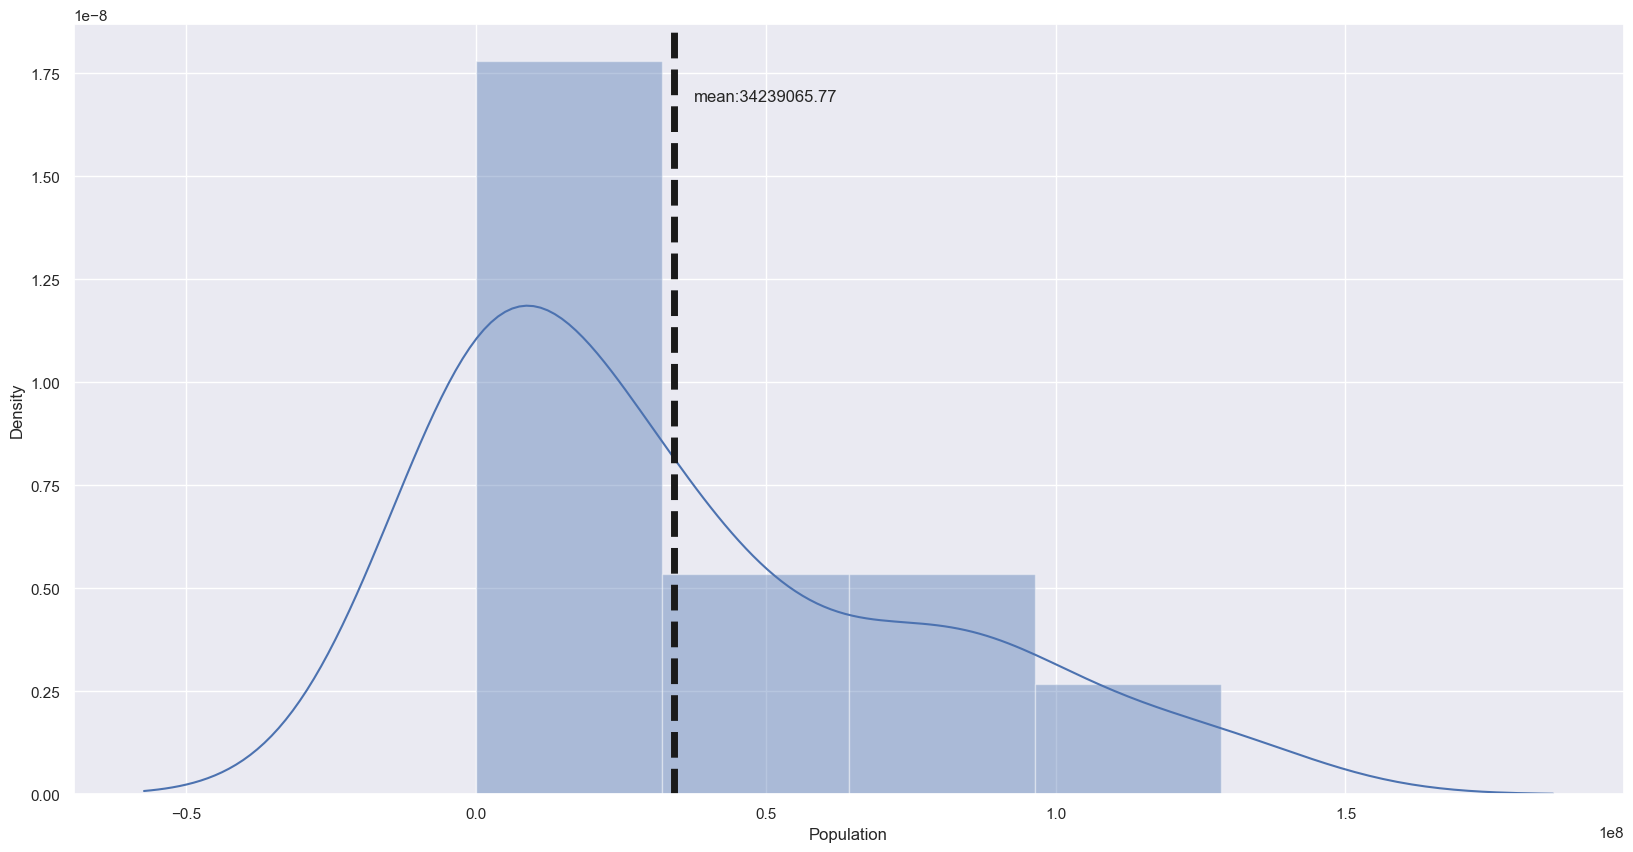

In [80]:
plot_distribution(frame3['Population'])
plt.savefig('ma.tif')

In [81]:
# 2-sample t-test & Mann-Whitney U Test

In [82]:
def compare_2_groups(arr_1,arr_2,alpha,sample_size):
    stat,p=ttest_ind(arr_1,arr_2)
    print('Statistics=%.3f,p=%.3f'%(stat,p))
    if p>alpha:
        print('same distribution(fail to reject H0)')
    else:
        print('different distribution (reject H0)')

In [83]:
ht_TotalVaccinationDoses=frame3['Total Vaccination Doses']
ht_TotalVaccinationDoses

0        629054
1      84147957
2       1596166
3      42998698
4     119963226
5       2001114
6      36927545
7       1319914
8      30710281
9       2572559
10     98534412
11     40581317
12     11770370
13     20272520
14     36992685
15    100209012
16     50729256
17       404656
18       112378
19    107931053
20    155773246
21      2666749
22      2348527
23      1440084
24      1515042
25     60803739
26      1620765
27     41717794
28     97164120
29      1045753
30    107856629
31     58332610
32      4962881
34     16068172
35    128418265
Name: Total Vaccination Doses, dtype: int64

In [84]:
ht_Dose1=frame3['Dose 1']
ht_Dose1

0       311893
1     40624263
2       856732
3     22535419
4     62590002
5      1088086
6     18855121
7       729023
8     16555043
9      1353009
10    49269034
11    21938012
12     6028184
13     9936338
14    21243308
15    49971474
16    26999013
17      219238
18       56831
19    54060775
20    84570317
21     1457120
22     1329229
23      783477
24      835771
25    31331147
26      903986
27    22309609
28    51029686
29      539208
30    56110543
31    29547155
32     2653391
34     8164652
35    67232447
Name: Dose 1, dtype: int64

In [85]:
ht_Dose2=frame3['Dose 2']
ht_Dose2

0       317161
1     43523694
2       739434
3     20463279
4     57373224
5       913028
6     18072424
7       590891
8     14155238
9      1219550
10    49265378
11    18643305
12     5742186
13    10336182
14    15749377
15    50237538
16    23730243
17      185418
18       55547
19    53870278
20    71202929
21     1209629
22     1019298
23      656607
24      679271
25    29472592
26      716779
27    19408185
28    46134434
29      506545
30    51746086
31    28785455
32     2309490
34     7903520
35    61185818
Name: Dose 2, dtype: int64

In [86]:
ht_Population=frame3['Population']
ht_Population

0        399001
1      91702478
2       1711947
3      35998752
4     128500364
5       1158040
6      32199722
7        773997
8      19301096
9       1521992
10     70400153
11     28900667
12      7503010
13     14999397
14     40100376
15     69599762
16     34698876
17       290492
18        66001
19     85002417
20    124904071
21      3436948
22      3772103
23      1308967
24      2073074
25     47099270
26      1646050
27     30501026
28     79502477
29       658019
30     83697770
31     38157311
32      4184959
34     11700099
35    100896618
Name: Population, dtype: int64

In [87]:
#Total Vaccination Doses vs Dose 1
sample_size=8
TotalVaccinationDoses_sampled=np.random.choice(ht_TotalVaccinationDoses,sample_size)
Dose1_sampled=np.random.choice(ht_Dose1,sample_size)
compare_2_groups(TotalVaccinationDoses_sampled,Dose1_sampled,0.05,sample_size)

Statistics=1.498,p=0.156
same distribution(fail to reject H0)


In [88]:
#Total Vaccination Doses vs Dose 1
#perform the Mann-Whitney U test
stats.mannwhitneyu(TotalVaccinationDoses_sampled, Dose1_sampled, alternative='two-sided')

MannwhitneyuResult(statistic=45.0, pvalue=0.19487179487179485)

In [89]:
# Total Vaccination Doses vs Dose 2
sample_size=8
TotalVaccinationDoses_sampled=np.random.choice(ht_TotalVaccinationDoses,sample_size)
Dose2_sampled=np.random.choice(ht_Dose2,sample_size)
compare_2_groups(TotalVaccinationDoses_sampled,Dose2_sampled,0.05,sample_size)

Statistics=-0.732,p=0.476
same distribution(fail to reject H0)


In [90]:
#Total Vaccination Doses vs Dose 2
#perform the Mann-Whitney U test
stats.mannwhitneyu(TotalVaccinationDoses_sampled, Dose2_sampled, alternative='two-sided')

MannwhitneyuResult(statistic=19.0, pvalue=0.18893744800299417)

In [91]:
# Dose 1  vs Dose 2
sample_size=8
Dose1_sampled=np.random.choice(ht_Dose1,sample_size)
Dose2_sampled=np.random.choice(ht_Dose2,sample_size)
compare_2_groups(Dose1_sampled,Dose2_sampled,0.05,sample_size)

Statistics=0.320,p=0.754
same distribution(fail to reject H0)


In [92]:
#Dose1 vs Dose 2
#perform the Mann-Whitney U test
stats.mannwhitneyu(Dose1_sampled, Dose2_sampled, alternative='two-sided')

MannwhitneyuResult(statistic=33.0, pvalue=0.9580602618255808)

In [93]:
# Dose 1  vs Population
sample_size=8
Dose1_sampled=np.random.choice(ht_Dose1,sample_size)
Population_sampled=np.random.choice(ht_Population,sample_size)
compare_2_groups(Dose1_sampled,Population_sampled,0.05,sample_size)

Statistics=-1.085,p=0.296
same distribution(fail to reject H0)


In [94]:
#Dose1 vs Population
#perform the Mann-Whitney U test
stats.mannwhitneyu(Dose1_sampled, Population_sampled, alternative='two-sided')

MannwhitneyuResult(statistic=23.0, pvalue=0.3709719490033826)

In [95]:
# Total VaccinationDoses vs Population
sample_size=8
TotalVaccinationDoses_sampled=np.random.choice(ht_TotalVaccinationDoses,sample_size)
Population_sampled=np.random.choice(ht_Population,sample_size)
compare_2_groups(TotalVaccinationDoses_sampled,Population_sampled,0.05,sample_size)

Statistics=0.065,p=0.949
same distribution(fail to reject H0)


In [96]:
# Total Vaccination Doses vs Population
#perform the Mann-Whitney U test
stats.mannwhitneyu(TotalVaccinationDoses_sampled, Population_sampled, alternative='two-sided')

MannwhitneyuResult(statistic=32.0, pvalue=1.0)

In [97]:
# Doses 2 vs Population
sample_size=8
Dose2_sampled=np.random.choice(ht_Dose2,sample_size)
Population_sampled=np.random.choice(ht_Population,sample_size)
compare_2_groups(Dose2_sampled,Population_sampled,0.05,sample_size)

Statistics=-0.220,p=0.829
same distribution(fail to reject H0)


In [98]:
# Dose 2 vs Population
#perform the Mann-Whitney U test
stats.mannwhitneyu(Dose2_sampled, Population_sampled, alternative='two-sided')

MannwhitneyuResult(statistic=40.0, pvalue=0.43055788764465364)

C:\Users\PHILIP\AppData\Local\Temp\ipykernel_2884\2750763945.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(df['State/UTs'], rotation=90)
C:\Users\PHILIP\AppData\Local\Temp\ipykernel_2884\2750763945.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(df['State/UTs'], rotation=90)
C:\Users\PHILIP\AppData\Local\Temp\ipykernel_2884\2750763945.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(df['State/UTs'], rotation=90)
C:\Users\PHILIP\AppData\Local\Temp\ipykernel_2884\2750763945.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(df['State/UTs'], rotation=90)


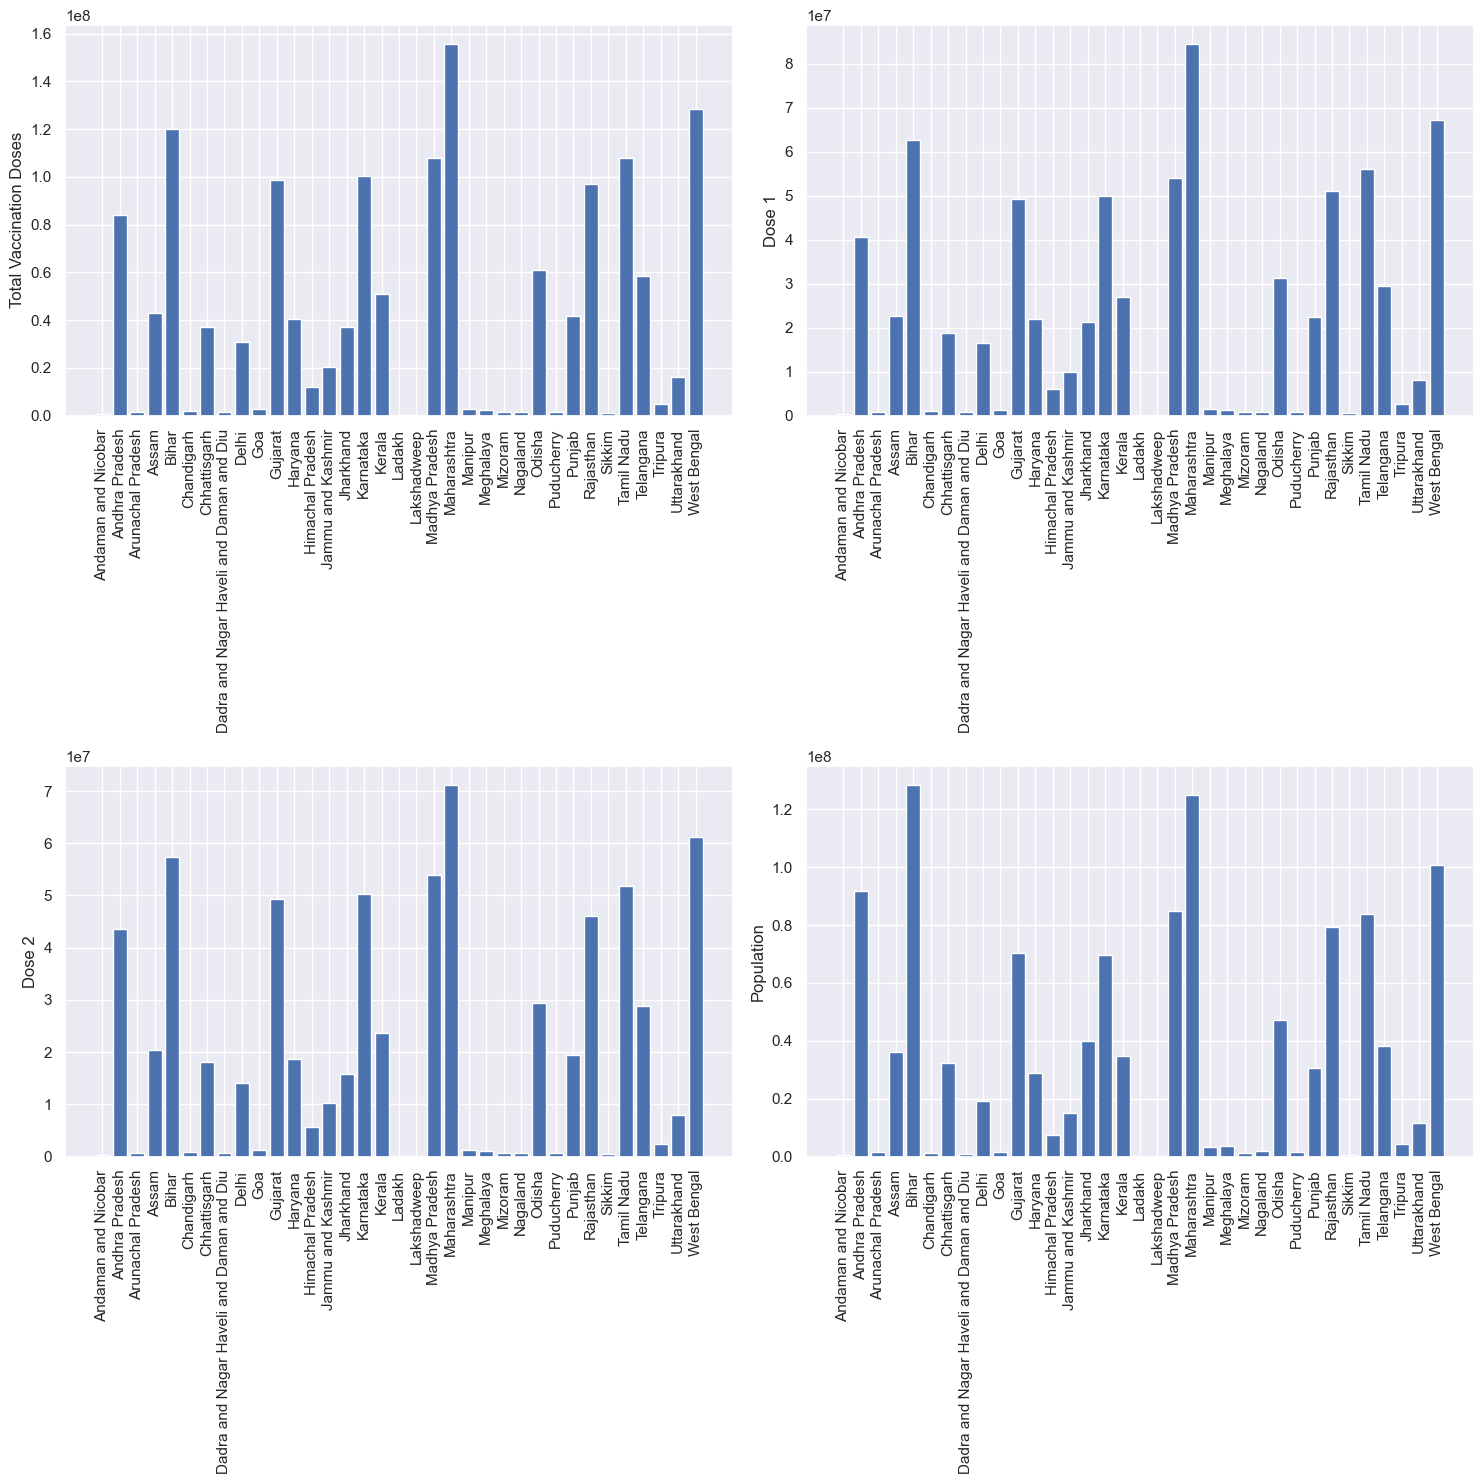

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'State/UTs': ['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'West Bengal'],
    'Total Vaccination Doses': [629054, 84147957, 1596166, 42998698, 119963226, 2001114, 36927545, 1319914, 30710281, 2572559, 98534412, 40581317, 11770370, 20272520, 36992685, 100209012, 50729256, 404656, 112378, 107931053, 155773246, 2666749, 2348527, 1440084, 1515042, 60803739, 1620765, 41717794, 97164120, 1045753, 107856629, 58332610, 4962881, 16068172, 128418265],
    'Dose 1': [311893, 40624263, 856732, 22535419, 62590002, 1088086, 18855121, 729023, 16555043, 1353009, 49269034, 21938012, 6028184, 9936338, 21243308, 49971474, 26999013, 219238, 56831, 54060775, 84570317, 1457120, 1329229, 783477, 835771, 31331147, 903986, 22309609, 51029686, 539208, 56110543, 29547155, 2653391, 8164652, 67232447],
    'Dose 2': [317161, 43523694, 739434, 20463279, 57373224, 913028, 18072424, 590891, 14155238, 1219550, 49265378, 18643305, 5742186, 10336182, 15749377, 50237538, 23730243, 185418, 55547, 53870278, 71202929, 1209629, 1019298, 656607, 679271, 29472592, 716779, 19408185, 46134434, 506545, 51746086, 28785455, 2309490, 7903520, 61185818],
    'Population': [399001, 91702478, 1711947, 35998752, 128500364, 1158040, 32199722, 773997, 19301096, 1521992, 70400153, 28900667, 7503010, 14999397, 40100376, 69599762, 34698876, 290492, 66001, 85002417, 124904071, 3436948, 3772103, 1308967, 2073074, 47099270, 1646050, 30501026, 79502477, 658019, 83697770, 38157311, 4184959, 11700099, 100896618]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting all attributes
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Total Vaccination Doses
axs[0, 0].bar(df['State/UTs'], df['Total Vaccination Doses'])
axs[0, 0].set_xticklabels(df['State/UTs'], rotation=90)
axs[0, 0].set_ylabel('Total Vaccination Doses')

# Dose 1
axs[0, 1].bar(df['State/UTs'], df['Dose 1'])
axs[0, 1].set_xticklabels(df['State/UTs'], rotation=90)
axs[0, 1].set_ylabel('Dose 1')

# Dose 2
axs[1, 0].bar(df['State/UTs'], df['Dose 2'])
axs[1, 0].set_xticklabels(df['State/UTs'], rotation=90)
axs[1, 0].set_ylabel('Dose 2')

# Population
axs[1, 1].bar(df['State/UTs'], df['Population'])
axs[1, 1].set_xticklabels(df['State/UTs'], rotation=90)
axs[1, 1].set_ylabel('Population')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


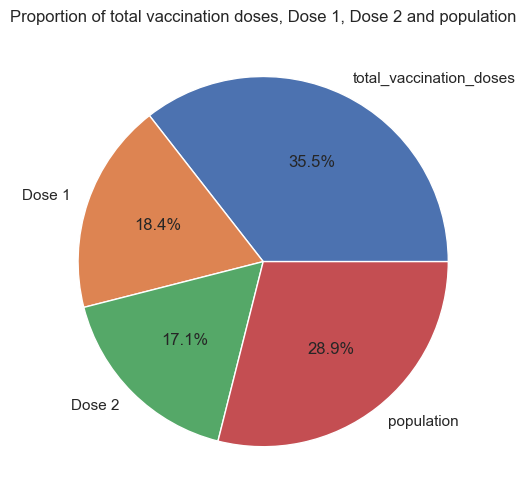

In [200]:
# Data
state_ut = [
    'Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
    'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
    'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
    'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
    'Telangana', 'Tripura', 'Uttarakhand', 'West Bengal'
]

total_vaccination_doses = [
    629054, 84147957, 1596166, 42998698, 119963226,
    2001114, 36927545, 1319914, 30710281, 2572559,
    98534412, 40581317, 11770370, 20272520, 36992685, 100209012,
    50729256, 404656, 112378, 107931053, 155773246, 2666749, 2348527,
    1440084, 1515042, 60803739, 1620765, 41717794, 97164120, 1045753, 107856629,
    58332610, 4962881, 16068172, 128418265
]

dose_1 = [
    311893, 40624263, 856732, 22535419, 62590002,
    1088086, 18855121, 729023, 16555043, 1353009,
    49269034, 21938012, 6028184, 9936338, 21243308, 49971474,
    26999013, 219238, 56831, 54060775, 84570317, 1457120, 1329229,
    783477, 835771, 31331147, 903986, 22309609, 51029686, 539208, 56110543,
    29547155, 2653391, 8164652, 67232447
]

dose_2 = [
    317161, 43523694, 739434, 20463279, 57373224,
    913028, 18072424, 590891, 14155238, 1219550,
    49265378, 18643305, 5742186, 10336182, 15749377, 50237538,
    23730243, 185418, 55547, 53870278, 71202929, 1209629, 1019298,
    656607, 679271, 29472592, 716779, 19408185, 46134434, 506545, 51746086,
    28785455, 2309490, 7903520, 61185818
]

population = [
    399001, 91702478, 1711947, 35998752, 128500364,
    1158040, 32199722, 773997, 19301096, 1521992,
    70400153, 28900667, 7503010, 14999397, 40100376, 69599762,
    34698876, 290492, 66001, 85002417, 124904071, 3436948, 3772103,
    1308967, 2073074, 47099270, 1646050, 30501026, 79502477, 658019, 83697770,
    38157311, 4184959, 11700099, 100896618
]

# Pie chart - Proportion of Dose 1 and Dose 2
plt.subplot(2, 2, 2)
labels = ['total_vaccination_doses','Dose 1', 'Dose 2','population']
sizes = [sum(total_vaccination_doses), sum(dose_1), sum(dose_2), sum(population)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of total vaccination doses, Dose 1, Dose 2 and population')


# Adjusting the spacing between subplots
plt.tight_layout()

# Display the infographic
plt.show()